# **libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder,label_binarize
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, StratifiedKFold,train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif, SelectKBest,chi2,RFECV


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef,roc_curve, auc, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Verinin incelenmesi

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data.xls",na_values ="?")
df2 = df
df2.head()

Q11_1  Q11_2  Q11_3  Q11_4  Q11_5  Q11_6  Q11_7  Q11_8  Q11_9  Q11_10  ...  \
0      0      0      0      1      1      0      0      1      0       0  ...   
1      1      0      0      1      0      0      1      0      0       1  ...   
2      1      1      0      1      0      0      1      1      0       1  ...   
3      0      0      0      0      0      0      0      0      0       0  ...   
4      1      1      0      1      0      0      1      1      0       1  ...   

   Q18_17  Q18_18  Q18_19  Q18_20  Q18_21  Q18_22  Q18_23  Q20  Q21  Q16  
0     5.0     5.0     5.0     5.0     5.0     5.0     5.0    3    3    A  
1     4.0     2.0     4.0     2.0     2.0     2.0     2.0    3    3    D  
2     4.0     4.0     NaN     NaN     4.0     2.0     4.0    4    1    A  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN    3    3    C  
4     NaN     NaN     1.0     1.0     NaN     NaN     NaN    3    3    D  

[5 rows x 75 columns]

In [ ]:
df2.shape

(6108, 75)

In [ ]:
print(df.describe())

             Q11_1        Q11_2        Q11_3        Q11_4        Q11_5  \
count  6108.000000  6108.000000  6108.000000  6108.000000  6108.000000   
mean      0.479044     0.295678     0.178782     0.584152     0.280779   
std       0.499602     0.456384     0.383201     0.492908     0.449417   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.000000     0.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             Q11_6        Q11_7        Q11_8        Q11_9       Q11_10  ...  \
count  6108.000000  6108.000000  6108.000000  6108.000000  6108.000000  ...   
mean      0.089555     0.379993     0.302227     0.076130     0.433366  ...   
std       0.285566     0.485425     0.459261     0.265227     0.495581  ...   
min       0.00000

A    2883
B    1526
C     892
D     807
Name: Q16, dtype: int64


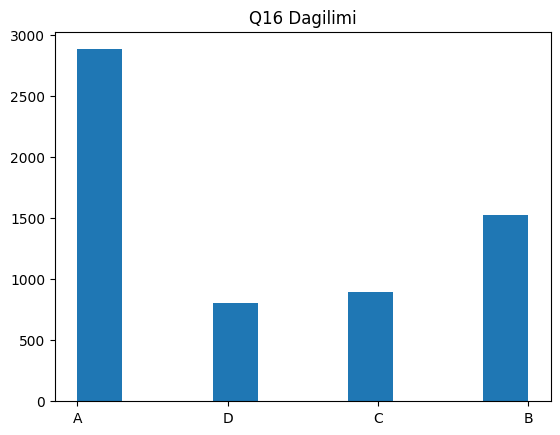

In [ ]:
class_distribution = df2['Q16'].value_counts()
print(class_distribution)

plt.hist(df2['Q16'])
plt.title('Q16 Dagilimi')
plt.show()

In [ ]:
columnsWithNulls = df2.columns[df2.isnull().any()]
nullValuesSelected = df2[columnsWithNulls].isnull().sum()
print("Missing Values:")
print(nullValuesSelected)

Missing Values:
Q14        422
Q15         92
Q17        742
Q18_1      559
Q18_2      889
Q18_3     1361
Q18_4      801
Q18_5     1588
Q18_6     1219
Q18_7      947
Q18_8      712
Q18_9     1055
Q18_10    1421
Q18_11     918
Q18_12    1126
Q18_13     738
Q18_14     787
Q18_15    1361
Q18_16    1460
Q18_17    1216
Q18_18    1027
Q18_19    1721
Q18_20    1098
Q18_21    1669
Q18_22    1700
Q18_23    1451
dtype: int64


A    2883
B    1526
C     892
Name: Q16, dtype: int64


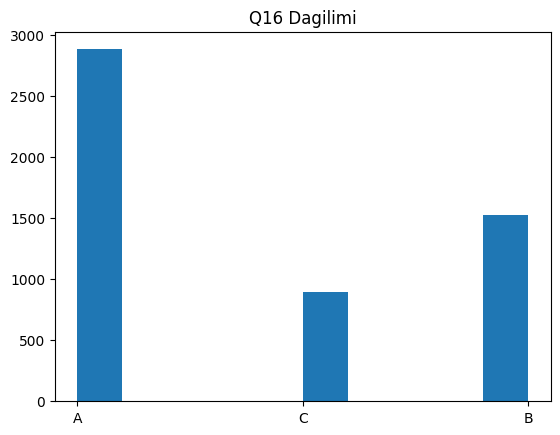

In [ ]:
df2 = df2[df2['Q16'] != 'D'] # D sinifinin cikarilmasi
class_distribution = df2['Q16'].value_counts()
print(class_distribution)

plt.hist(df2['Q16'])
plt.title('Q16 Dagilimi')
plt.show()

In [ ]:
columnsWithNulls = df2.columns[df2.isnull().any()]
nullValuesSelected = df2[columnsWithNulls].isnull().sum()
print("Missing Values:")
print(nullValuesSelected)

Missing Values:
Q14        202
Q15         28
Q17        425
Q18_1      304
Q18_2      571
Q18_3      969
Q18_4      501
Q18_5     1168
Q18_6      844
Q18_7      609
Q18_8      428
Q18_9      700
Q18_10    1012
Q18_11     605
Q18_12     776
Q18_13     465
Q18_14     471
Q18_15     964
Q18_16    1048
Q18_17     827
Q18_18     677
Q18_19    1245
Q18_20     735
Q18_21    1243
Q18_22    1267
Q18_23    1057
dtype: int64


In [ ]:
encoder = LabelEncoder()

df2['Q16'] = encoder.fit_transform(df2['Q16'])
df2['Q16']

<ipython-input-63-3fefef5b1edb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q16'] = encoder.fit_transform(df2['Q16'])


0       0
2       0
3       2
5       1
6       0
       ..
6102    0
6103    1
6104    0
6105    0
6106    0
Name: Q16, Length: 5301, dtype: int64

In [ ]:
# Eksik değerleri doldur
imputer = KNNImputer(n_neighbors=5)
df2_imputed = imputer.fit_transform(df2)
df2_imputed = pd.DataFrame(df2_imputed, columns=df2.columns)
df2_imputed.to_excel("/content/drive/MyDrive/Colab Notebooks/Imputed_Data.xlsx", index=False)

#eksik deger kontrolü
columnsWithNulls = df2_imputed.columns[df2.isnull().any()]
nullValuesSelected = df2_imputed[columnsWithNulls].isnull().sum()
print("After the fill missing values:")
print(nullValuesSelected)

After the fill missing values:
Q14       0
Q15       0
Q17       0
Q18_1     0
Q18_2     0
Q18_3     0
Q18_4     0
Q18_5     0
Q18_6     0
Q18_7     0
Q18_8     0
Q18_9     0
Q18_10    0
Q18_11    0
Q18_12    0
Q18_13    0
Q18_14    0
Q18_15    0
Q18_16    0
Q18_17    0
Q18_18    0
Q18_19    0
Q18_20    0
Q18_21    0
Q18_22    0
Q18_23    0
dtype: int64


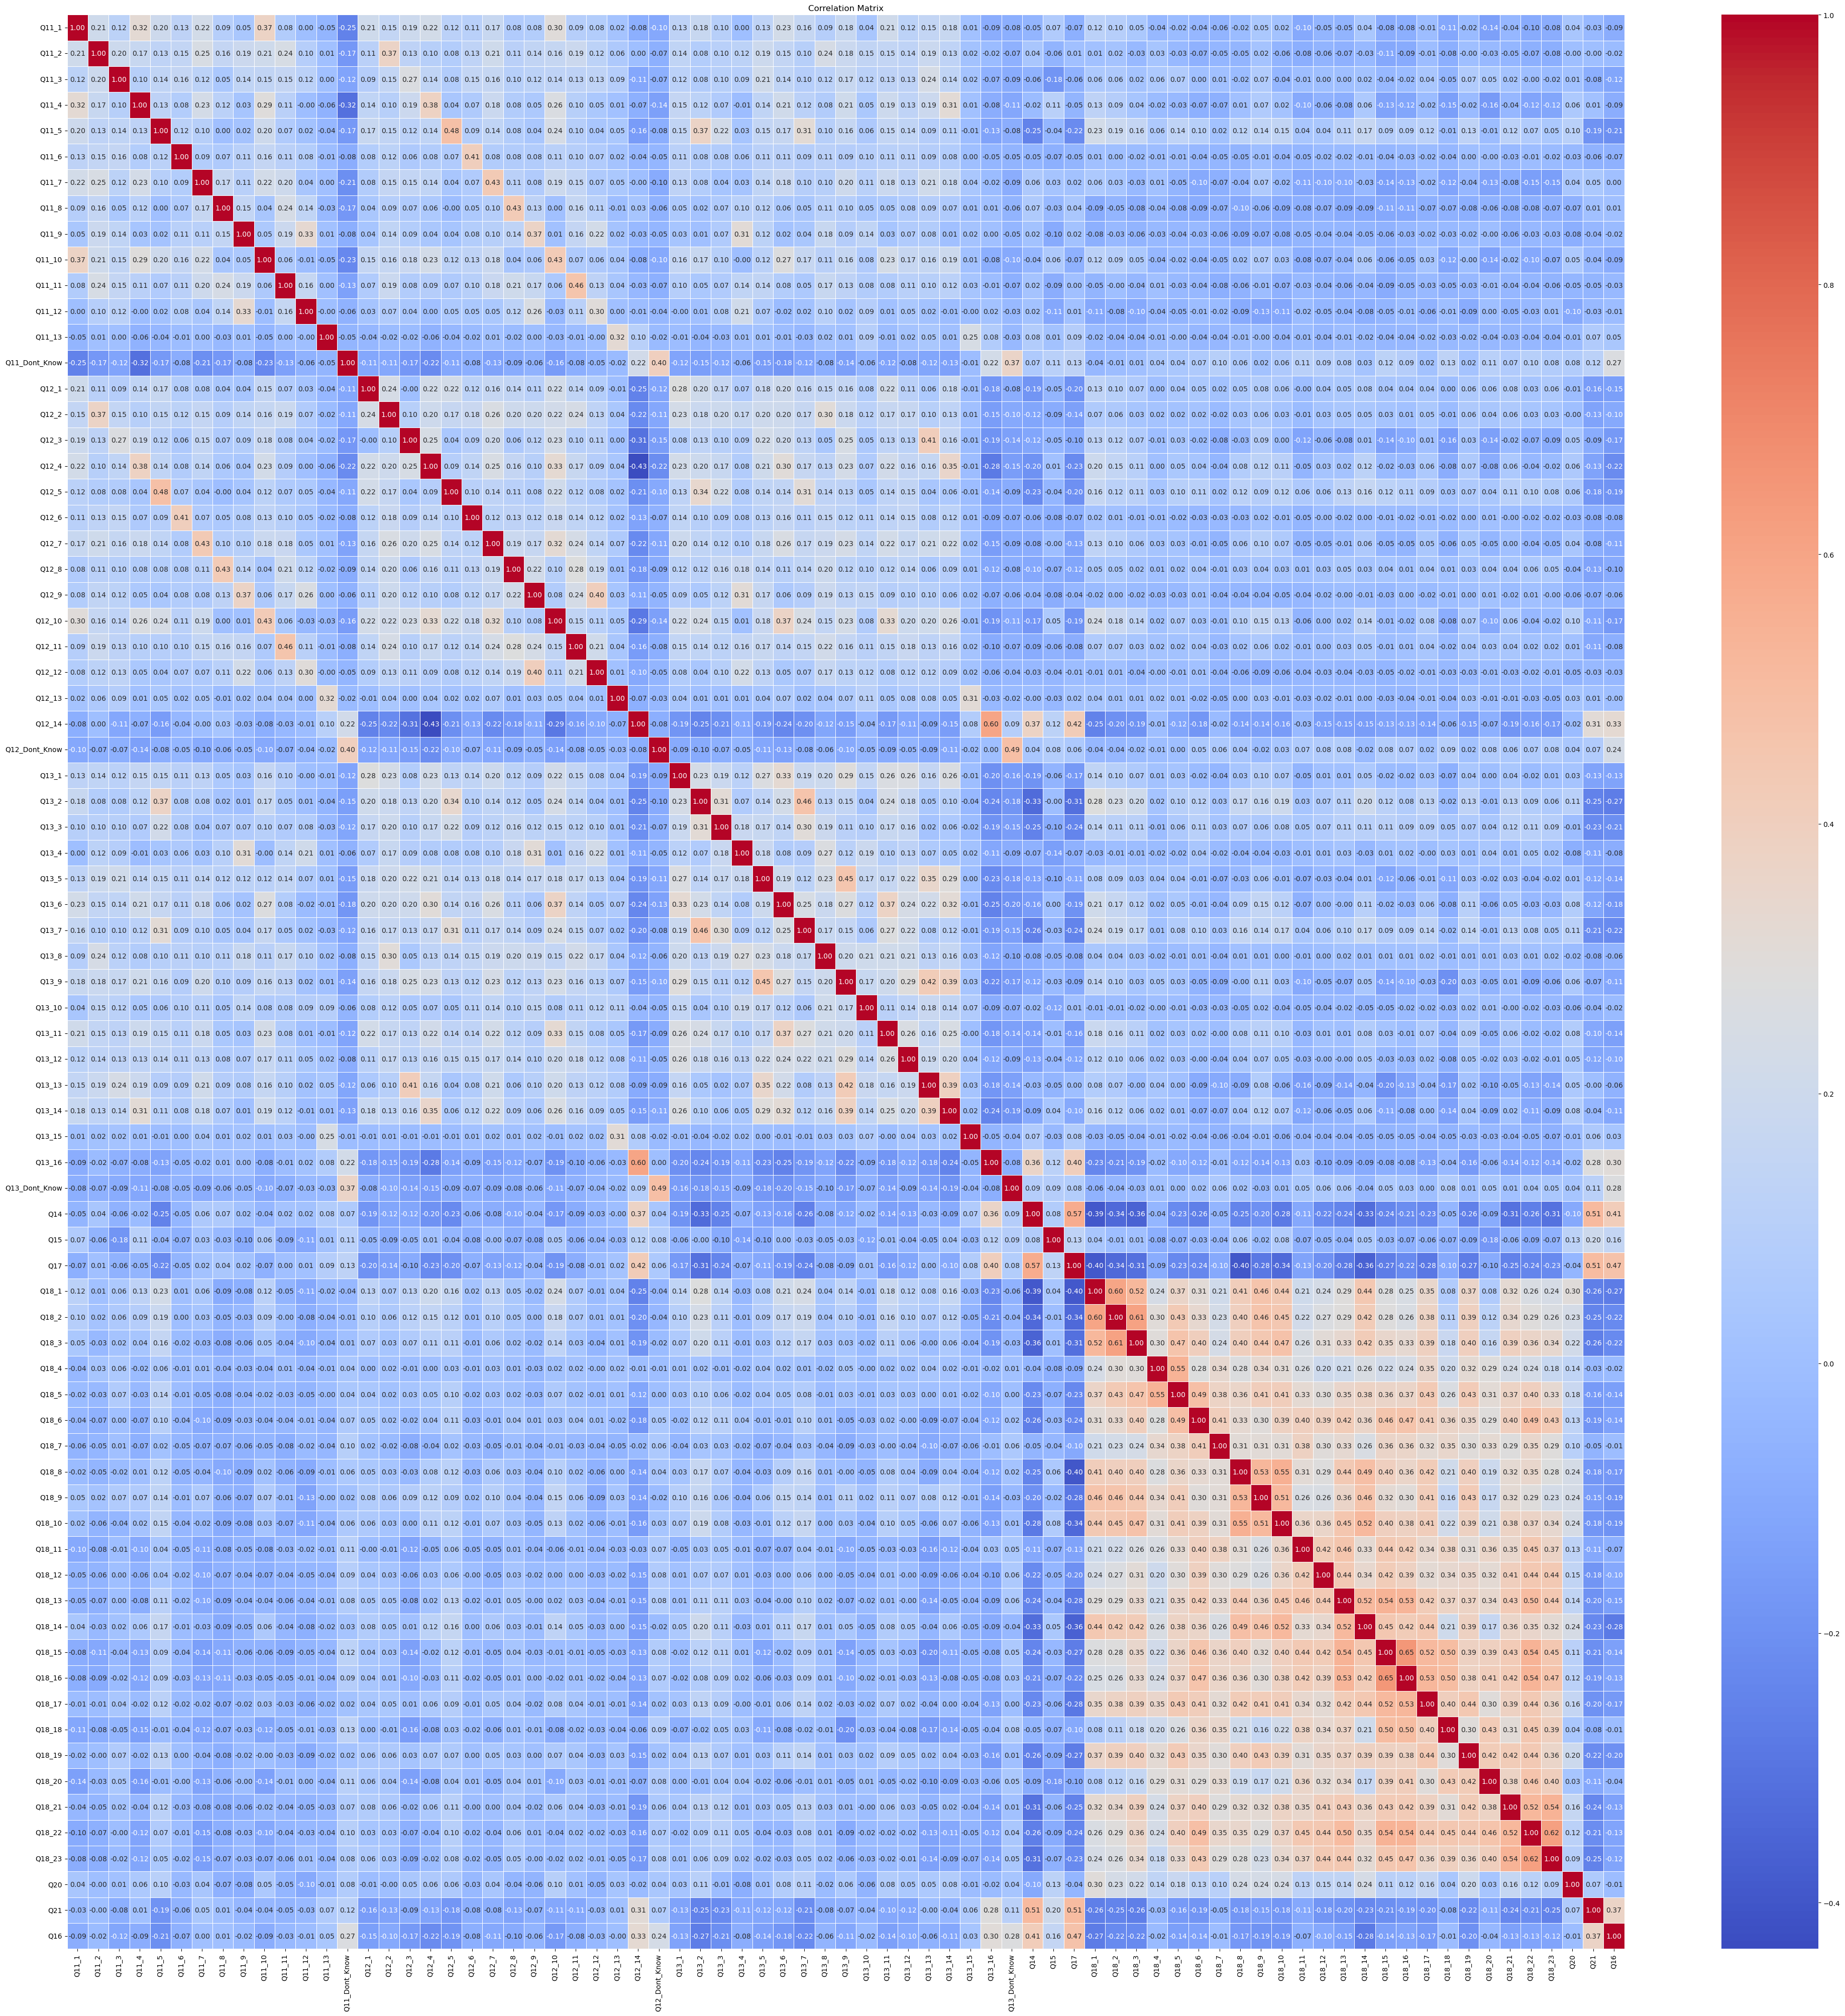

In [ ]:
correlation_matrix = df2_imputed.corr()

plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df2 = df2_imputed

In [ ]:
X = df2.drop('Q16', axis=1)
y = df2['Q16']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
crossValidation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Classification Methods with Class Weights

In [ ]:
class_weights = y.value_counts().max() / y.value_counts()
print("Class Weights: ",class_weights)

Class Weights:  0.0    1.000000
1.0    1.889253
2.0    3.232063
Name: Q16, dtype: float64


## Gradient Boosting

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    sample_weight = y_train.map(class_weights)


    model = GradientBoostingClassifier()
    model.fit(X_train, y_train, sample_weight=sample_weight)


    predictions = model.predict(X_test)
    y_score = model.predict_proba(X_test)


    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7078228086710651
Fold 2: 0.7075471698113207
Fold 3: 0.7292452830188679
Fold 4: 0.7160377358490566
Fold 5: 0.7132075471698113
Mean Accuracy: 0.7147721089040244, Standard Deviation Accuracy: 0.007924833784551184

Precision Scores:
Fold 1: 0.7261861422034774
Fold 2: 0.7192002345337203
Fold 3: 0.7396605804271368
Fold 4: 0.725107964812965
Fold 5: 0.7194604651833073
Mean Precision: 0.7259230774321213, Standard Deviation Precision: 0.007435248131824485

Recall Scores:
Fold 1: 0.7078228086710651
Fold 2: 0.7075471698113207
Fold 3: 0.7292452830188679
Fold 4: 0.7160377358490566
Fold 5: 0.7132075471698113
Mean Recall: 0.7147721089040244, Standard Deviation Recall: 0.007924833784551184

F1 Scores:
Fold 1: 0.7132804567944244
Fold 2: 0.711021190806772
Fold 3: 0.7324390424619867
Fold 4: 0.7186220759658027
Fold 5: 0.7143218231350772
Mean F1: 0.7179369178328127, Standard Deviation F1: 0.007659763440232734

AUC Scores:
Fold 1: 0.8563183122911733
Fold 2: 0.8507626667752723
Fold 

## Random Forest

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}


for train_index, test_index in crossValidation.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    sample_weight = y_train.map(class_weights)


    model = RandomForestClassifier()
    model.fit(X_train, y_train, sample_weight=sample_weight)


    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))


for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7134778510838832
Fold 2: 0.720754716981132
Fold 3: 0.7056603773584905
Fold 4: 0.7075471698113207
Fold 5: 0.7273584905660377
Mean Accuracy: 0.7149597211601729, Standard Deviation Accuracy: 0.008135491514456954

Precision Scores:
Fold 1: 0.701061422110319
Fold 2: 0.7088567138193693
Fold 3: 0.6869731348584808
Fold 4: 0.6939255219791545
Fold 5: 0.7163191940447625
Mean Precision: 0.7014271973624171, Standard Deviation Precision: 0.01041439511378078

Recall Scores:
Fold 1: 0.7134778510838832
Fold 2: 0.720754716981132
Fold 3: 0.7056603773584905
Fold 4: 0.7075471698113207
Fold 5: 0.7273584905660377
Mean Recall: 0.7149597211601729, Standard Deviation Recall: 0.008135491514456954

F1 Scores:
Fold 1: 0.6970161382655221
Fold 2: 0.6953830122404575
Fold 3: 0.6824852162720916
Fold 4: 0.684780450108242
Fold 5: 0.7089003146200892
Mean F1: 0.6937130263012804, Standard Deviation F1: 0.009489022749050419

AUC Scores:
Fold 1: 0.8502976646128414
Fold 2: 0.843448015815424
Fold 3: 0

## XGBC

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    sample_weight = y_train.map(class_weights)

    model = XGBClassifier()
    model.fit(X_train, y_train, sample_weight=sample_weight)

    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.708765315739868
Fold 2: 0.7160377358490566
Fold 3: 0.719811320754717
Fold 4: 0.7056603773584905
Fold 5: 0.7132075471698113
Mean Accuracy: 0.7126964593743887, Standard Deviation Accuracy: 0.005039978811180944

Precision Scores:
Fold 1: 0.706504099160505
Fold 2: 0.7128590352924716
Fold 3: 0.7147041639540154
Fold 4: 0.7052096180157333
Fold 5: 0.7056792024198023
Mean Precision: 0.7089912237685054, Standard Deviation Precision: 0.003976266285034878

Recall Scores:
Fold 1: 0.708765315739868
Fold 2: 0.7160377358490566
Fold 3: 0.719811320754717
Fold 4: 0.7056603773584905
Fold 5: 0.7132075471698113
Mean Recall: 0.7126964593743887, Standard Deviation Recall: 0.005039978811180944

F1 Scores:
Fold 1: 0.7075422440759639
Fold 2: 0.7141722204334627
Fold 3: 0.7164016483763218
Fold 4: 0.7052587409708919
Fold 5: 0.7084165420465393
Mean F1: 0.710358279180636, Standard Deviation F1: 0.004213647965283609

AUC Scores:
Fold 1: 0.8455523388440425
Fold 2: 0.8436682119439363
Fold 3: 0

## Logistic Reg

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    sample_weight = y_train.map(class_weights)

    model = LogisticRegression()
    model.fit(X_train, y_train, sample_weight=sample_weight)

    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.6767200754005656
Fold 2: 0.689622641509434
Fold 3: 0.6981132075471698
Fold 4: 0.6971698113207547
Fold 5: 0.6933962264150944
Mean Accuracy: 0.6910043924386036, Standard Deviation Accuracy: 0.007748799402290718

Precision Scores:
Fold 1: 0.6942018073959084
Fold 2: 0.7017833639086327
Fold 3: 0.7145642321129053
Fold 4: 0.7097413833896876
Fold 5: 0.7009116200293367
Mean Precision: 0.7042404813672942, Standard Deviation Precision: 0.007137695309191386

Recall Scores:
Fold 1: 0.6767200754005656
Fold 2: 0.689622641509434
Fold 3: 0.6981132075471698
Fold 4: 0.6971698113207547
Fold 5: 0.6933962264150944
Mean Recall: 0.6910043924386036, Standard Deviation Recall: 0.007748799402290718

F1 Scores:
Fold 1: 0.6818859288469314
Fold 2: 0.692207780381882
Fold 3: 0.7028570238421391
Fold 4: 0.7008938212747791
Fold 5: 0.6953126106744082
Mean F1: 0.694631433004028, Standard Deviation F1: 0.007425144076173648

AUC Scores:
Fold 1: 0.8378404326349417
Fold 2: 0.8411277095031984
Fold 3:

## DecisionTree

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    sample_weight = y_train.map(class_weights)

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train, sample_weight=sample_weight)

    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.6098020735155514
Fold 2: 0.6037735849056604
Fold 3: 0.6330188679245283
Fold 4: 0.5858490566037736
Fold 5: 0.6141509433962264
Mean Accuracy: 0.609318905269148, Standard Deviation Accuracy: 0.015276482894904709

Precision Scores:
Fold 1: 0.6100399505591447
Fold 2: 0.6010267775280349
Fold 3: 0.6242371071525845
Fold 4: 0.5879069269814882
Fold 5: 0.6141463852998966
Mean Precision: 0.6074714295042298, Standard Deviation Precision: 0.012300760792315448

Recall Scores:
Fold 1: 0.6098020735155514
Fold 2: 0.6037735849056604
Fold 3: 0.6330188679245283
Fold 4: 0.5858490566037736
Fold 5: 0.6141509433962264
Mean Recall: 0.609318905269148, Standard Deviation Recall: 0.015276482894904709

F1 Scores:
Fold 1: 0.6099121299505507
Fold 2: 0.602327320704948
Fold 3: 0.6278243600462918
Fold 4: 0.5868044033880268
Fold 5: 0.6141323792014479
Mean F1: 0.6082001186582531, Standard Deviation F1: 0.013531444384087416

AUC Scores:
Fold 1: 0.6697855840713982
Fold 2: 0.6606279213864258
Fold 3

## Support Vector Machines - SVM

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    sample_weight = y_train.map(class_weights)

    model = SVC(probability=True)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.6880301602262017
Fold 2: 0.6962264150943396
Fold 3: 0.7047169811320755
Fold 4: 0.6952830188679245
Fold 5: 0.6943396226415094
Mean Accuracy: 0.6957192395924101, Standard Deviation Accuracy: 0.005337268079381302

Precision Scores:
Fold 1: 0.7005792619894557
Fold 2: 0.7039091396029419
Fold 3: 0.7099808222535542
Fold 4: 0.7012770116967769
Fold 5: 0.6961053696940036
Mean Precision: 0.7023703210473465, Standard Deviation Precision: 0.004559397427322643

Recall Scores:
Fold 1: 0.6880301602262017
Fold 2: 0.6962264150943396
Fold 3: 0.7047169811320755
Fold 4: 0.6952830188679245
Fold 5: 0.6943396226415094
Mean Recall: 0.6957192395924101, Standard Deviation Recall: 0.005337268079381302

F1 Scores:
Fold 1: 0.6927830218652355
Fold 2: 0.6988646276536056
Fold 3: 0.7068677462004986
Fold 4: 0.6978575671885442
Fold 5: 0.6951135210802035
Mean F1: 0.6982972967976175, Standard Deviation F1: 0.004785634445824053

AUC Scores:
Fold 1: 0.8456481163168775
Fold 2: 0.845285212600633
Fold

## AdaBoost

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    sample_weight = y_train.map(class_weights)

    model = AdaBoostClassifier()
    model.fit(X_train, y_train, sample_weight=sample_weight)

    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.6682375117813384
Fold 2: 0.690566037735849
Fold 3: 0.7009433962264151
Fold 4: 0.6830188679245283
Fold 5: 0.6632075471698113
Mean Accuracy: 0.6811946721675884, Standard Deviation Accuracy: 0.013946949169520636

Precision Scores:
Fold 1: 0.6825306050829091
Fold 2: 0.6966764232232777
Fold 3: 0.7062847035626805
Fold 4: 0.6884408376533051
Fold 5: 0.6672254138809276
Mean Precision: 0.6882315966806198, Standard Deviation Precision: 0.013198746654334943

Recall Scores:
Fold 1: 0.6682375117813384
Fold 2: 0.690566037735849
Fold 3: 0.7009433962264151
Fold 4: 0.6830188679245283
Fold 5: 0.6632075471698113
Mean Recall: 0.6811946721675884, Standard Deviation Recall: 0.013946949169520636

F1 Scores:
Fold 1: 0.6728697919396022
Fold 2: 0.6910942642750436
Fold 3: 0.702690742485091
Fold 4: 0.6840304433544513
Fold 5: 0.6640220874749693
Mean F1: 0.6829414659058315, Standard Deviation F1: 0.013543038176339272

AUC Scores:
Fold 1: 0.7850750009729575
Fold 2: 0.7811457682073747
Fold 3

# Over Sampling with SMOTE

In [ ]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_scaled, y)

In [ ]:
class_distribution = pd.Series(y_smote).value_counts()
print("Class distribution after SMOTE:\n", class_distribution)

Class distribution after SMOTE:
 0.0    2883
2.0    2883
1.0    2883
Name: Q16, dtype: int64


## Linear Discriminant Analysis (LDA)

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = LDA(solver='svd')

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7121387283236994
Fold 2: 0.708092485549133
Fold 3: 0.7161849710982658
Fold 4: 0.6959537572254335
Fold 5: 0.7142857142857143
Mean Accuracy: 0.7093311312964492, Standard Deviation Accuracy: 0.007209632362570684

Precision Scores:
Fold 1: 0.7226312561031815
Fold 2: 0.719864068752072
Fold 3: 0.7263318066103349
Fold 4: 0.7085698007039933
Fold 5: 0.7231552969386361
Mean Precision: 0.7201104458216435, Standard Deviation Precision: 0.006124999987839657

Recall Scores:
Fold 1: 0.7121387283236994
Fold 2: 0.708092485549133
Fold 3: 0.7161849710982658
Fold 4: 0.6959537572254335
Fold 5: 0.7142857142857143
Mean Recall: 0.7093311312964492, Standard Deviation Recall: 0.007209632362570684

F1 Scores:
Fold 1: 0.7157930221683515
Fold 2: 0.7123387429722984
Fold 3: 0.7199176739108538
Fold 4: 0.7002578264494427
Fold 5: 0.7174539936468768
Mean F1: 0.7131522518295647, Standard Deviation F1: 0.0069018488700841275

AUC Scores:
Fold 1: 0.8826215140600294
Fold 2: 0.8847432178581793
Fold 

## ANN

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam')

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Scores:
Fold 1: 0.8364161849710983
Fold 2: 0.8369942196531792
Fold 3: 0.8242774566473988
Fold 4: 0.8236994219653179
Fold 5: 0.8305378831694621
Mean Accuracy: 0.8303850332812912, Standard Deviation Accuracy: 0.0056934943452903435

Precision Scores:
Fold 1: 0.834835170266344
Fold 2: 0.8358888598968408
Fold 3: 0.8235588636843835
Fold 4: 0.8236721811629817
Fold 5: 0.8314458518245758
Mean Precision: 0.8298801853670252, Standard Deviation Precision: 0.005321762498024309

Recall Scores:
Fold 1: 0.8364161849710983
Fold 2: 0.8369942196531792
Fold 3: 0.8242774566473988
Fold 4: 0.8236994219653179
Fold 5: 0.8305378831694621
Mean Recall: 0.8303850332812912, Standard Deviation Recall: 0.0056934943452903435

F1 Scores:
Fold 1: 0.8347360127987546
Fold 2: 0.836181887003434
Fold 3: 0.8232324160443976
Fold 4: 0.8227624339220632
Fold 5: 0.8293212397019714
Mean F1: 0.8292467978941241, Standard Deviation F1: 0.005593786695299065

AUC Scores:
Fold 1: 0.9297897659451837
Fold 2: 0.9272326306269246
Fol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Ada Boost

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = AdaBoostClassifier()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7473988439306358
Fold 2: 0.7583815028901734
Fold 3: 0.7445086705202312
Fold 4: 0.7445086705202312
Fold 5: 0.7651821862348178
Mean Accuracy: 0.7519959748192179, Standard Deviation Accuracy: 0.008341513099910151

Precision Scores:
Fold 1: 0.746012035975393
Fold 2: 0.7565462076529005
Fold 3: 0.7431690704381637
Fold 4: 0.741632024014602
Fold 5: 0.7620446124091924
Mean Precision: 0.7498807900980504, Standard Deviation Precision: 0.008005534904695324

Recall Scores:
Fold 1: 0.7473988439306358
Fold 2: 0.7583815028901734
Fold 3: 0.7445086705202312
Fold 4: 0.7445086705202312
Fold 5: 0.7651821862348178
Mean Recall: 0.7519959748192179, Standard Deviation Recall: 0.008341513099910151

F1 Scores:
Fold 1: 0.7466257831121258
Fold 2: 0.7570203499539017
Fold 3: 0.7435164968134659
Fold 4: 0.7427159055151633
Fold 5: 0.7629657528225388
Mean F1: 0.7505688576434391, Standard Deviation F1: 0.00802816604559429

AUC Scores:
Fold 1: 0.876373634178501
Fold 2: 0.8853661865266819
Fold 3:

## Decision Tree

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = DecisionTreeClassifier()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7317919075144509
Fold 2: 0.7427745664739884
Fold 3: 0.7445086705202312
Fold 4: 0.7213872832369942
Fold 5: 0.7264314632735686
Mean Accuracy: 0.7333787782038467, Standard Deviation Accuracy: 0.009019253129356392

Precision Scores:
Fold 1: 0.7332221267052681
Fold 2: 0.743748367357811
Fold 3: 0.7419483646156559
Fold 4: 0.7236407614341789
Fold 5: 0.7254139398175214
Mean Precision: 0.7335947119860871, Standard Deviation Precision: 0.008234381753580967

Recall Scores:
Fold 1: 0.7317919075144509
Fold 2: 0.7427745664739884
Fold 3: 0.7445086705202312
Fold 4: 0.7213872832369942
Fold 5: 0.7264314632735686
Mean Recall: 0.7333787782038467, Standard Deviation Recall: 0.009019253129356392

F1 Scores:
Fold 1: 0.7324417733251137
Fold 2: 0.7431425884922085
Fold 3: 0.7424543799718984
Fold 4: 0.7224114251287463
Fold 5: 0.7258757819208816
Mean F1: 0.7332651897677697, Standard Deviation F1: 0.008427215340481119

AUC Scores:
Fold 1: 0.7988276501632253
Fold 2: 0.8071062869973852
Fold

## Logistic Reg

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = LogisticRegression(multi_class='multinomial', C=1.0, solver='lbfgs')

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7300578034682081
Fold 2: 0.7358381502890173
Fold 3: 0.730635838150289
Fold 4: 0.7254335260115607
Fold 5: 0.739733950260266
Mean Accuracy: 0.7323398536358683, Standard Deviation Accuracy: 0.004954180605538089

Precision Scores:
Fold 1: 0.7272695139555814
Fold 2: 0.7359073991338173
Fold 3: 0.7310710972815259
Fold 4: 0.7251200737197624
Fold 5: 0.7374066426704156
Mean Precision: 0.7313549453522205, Standard Deviation Precision: 0.004753794685548315

Recall Scores:
Fold 1: 0.7300578034682081
Fold 2: 0.7358381502890173
Fold 3: 0.730635838150289
Fold 4: 0.7254335260115607
Fold 5: 0.739733950260266
Mean Recall: 0.7323398536358683, Standard Deviation Recall: 0.004954180605538089

F1 Scores:
Fold 1: 0.7284429666980629
Fold 2: 0.7357002735489133
Fold 3: 0.730848680189104
Fold 4: 0.7252216215844594
Fold 5: 0.7383398818467137
Mean F1: 0.7317106847734507, Standard Deviation F1: 0.0047621853560698415

AUC Scores:
Fold 1: 0.889326250636253
Fold 2: 0.8917231383834077
Fold 3: 

## XGBC

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = XGBClassifier()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.8341040462427746
Fold 2: 0.8260115606936416
Fold 3: 0.8184971098265896
Fold 4: 0.8346820809248555
Fold 5: 0.8316946211683054
Mean Accuracy: 0.8289978837712333, Standard Deviation Accuracy: 0.006080127696291499

Precision Scores:
Fold 1: 0.8331776627514552
Fold 2: 0.8279349377294083
Fold 3: 0.8193526545115051
Fold 4: 0.8353139396455237
Fold 5: 0.8311340065846193
Mean Precision: 0.8293826402445023, Standard Deviation Precision: 0.005573979706573542

Recall Scores:
Fold 1: 0.8341040462427746
Fold 2: 0.8260115606936416
Fold 3: 0.8184971098265896
Fold 4: 0.8346820809248555
Fold 5: 0.8316946211683054
Mean Recall: 0.8289978837712333, Standard Deviation Recall: 0.006080127696291499

F1 Scores:
Fold 1: 0.8327550333864747
Fold 2: 0.8255120570553431
Fold 3: 0.8179729704755376
Fold 4: 0.8346266662202423
Fold 5: 0.8309789216250736
Mean F1: 0.8283691297525342, Standard Deviation F1: 0.006024067049072384

AUC Scores:
Fold 1: 0.9521991450549412
Fold 2: 0.9466696415652712
Fol

## Random Forest

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = RandomForestClassifier()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.8456647398843931
Fold 2: 0.8179190751445087
Fold 3: 0.8236994219653179
Fold 4: 0.8236994219653179
Fold 5: 0.8467322151532678
Mean Accuracy: 0.8315429748225609, Standard Deviation Accuracy: 0.012155579423227167

Precision Scores:
Fold 1: 0.8453131882153001
Fold 2: 0.8185794337180062
Fold 3: 0.8240525954550211
Fold 4: 0.8238149377754084
Fold 5: 0.8465726098240437
Mean Precision: 0.8316665529975559, Standard Deviation Precision: 0.011826361105378122

Recall Scores:
Fold 1: 0.8456647398843931
Fold 2: 0.8179190751445087
Fold 3: 0.8236994219653179
Fold 4: 0.8236994219653179
Fold 5: 0.8467322151532678
Mean Recall: 0.8315429748225609, Standard Deviation Recall: 0.012155579423227167

F1 Scores:
Fold 1: 0.8446848275538917
Fold 2: 0.8168695888496796
Fold 3: 0.8221528952684481
Fold 4: 0.8237031031437511
Fold 5: 0.8465130229710711
Mean F1: 0.8307846875573685, Standard Deviation F1: 0.012319748981045478

AUC Scores:
Fold 1: 0.9532436589590354
Fold 2: 0.9434134430009998
Fol

## GradientBoosting

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = GradientBoostingClassifier()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.8086705202312139
Fold 2: 0.8023121387283237
Fold 3: 0.7942196531791907
Fold 4: 0.7867052023121387
Fold 5: 0.8131868131868132
Mean Accuracy: 0.8010188655275361, Standard Deviation Accuracy: 0.00958529674779878

Precision Scores:
Fold 1: 0.8072899431386071
Fold 2: 0.8029397563013437
Fold 3: 0.7939220777816101
Fold 4: 0.7870933040079421
Fold 5: 0.8114353828858738
Mean Precision: 0.8005360928230753, Standard Deviation Precision: 0.008884147479318297

Recall Scores:
Fold 1: 0.8086705202312139
Fold 2: 0.8023121387283237
Fold 3: 0.7942196531791907
Fold 4: 0.7867052023121387
Fold 5: 0.8131868131868132
Mean Recall: 0.8010188655275361, Standard Deviation Recall: 0.00958529674779878

F1 Scores:
Fold 1: 0.8077962571322238
Fold 2: 0.8018053960887226
Fold 3: 0.792600885018304
Fold 4: 0.786547603280631
Fold 5: 0.8119424446796422
Mean F1: 0.8001385172399047, Standard Deviation F1: 0.009405115736811891

AUC Scores:
Fold 1: 0.9385806658688697
Fold 2: 0.93206428476519
Fold 3: 0

## Naive Bayes

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = GaussianNB()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.653757225433526
Fold 2: 0.6450867052023121
Fold 3: 0.6774566473988439
Fold 4: 0.6514450867052023
Fold 5: 0.6807403123192597
Mean Accuracy: 0.6616971954118288, Standard Deviation Accuracy: 0.014526237432111597

Precision Scores:
Fold 1: 0.6515426777236227
Fold 2: 0.6432640920562558
Fold 3: 0.6730802553549406
Fold 4: 0.6499627369518682
Fold 5: 0.6805731175875805
Mean Precision: 0.6596845759348535, Standard Deviation Precision: 0.014465215864299304

Recall Scores:
Fold 1: 0.653757225433526
Fold 2: 0.6450867052023121
Fold 3: 0.6774566473988439
Fold 4: 0.6514450867052023
Fold 5: 0.6807403123192597
Mean Recall: 0.6616971954118288, Standard Deviation Recall: 0.014526237432111597

F1 Scores:
Fold 1: 0.6521321648765558
Fold 2: 0.6441153326474162
Fold 3: 0.6747893654653301
Fold 4: 0.6506289165735093
Fold 5: 0.680269380931851
Mean F1: 0.6603870320989325, Standard Deviation F1: 0.014358738496245102

AUC Scores:
Fold 1: 0.824346801093434
Fold 2: 0.8149076018567092
Fold 3:

## kNN

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = KNeighborsClassifier(n_neighbors=5)

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7277456647398844
Fold 2: 0.7294797687861272
Fold 3: 0.7352601156069364
Fold 4: 0.7502890173410405
Fold 5: 0.7478311162521689
Mean Accuracy: 0.7381211365452315, Standard Deviation Accuracy: 0.009304301389262446

Precision Scores:
Fold 1: 0.7558318464587597
Fold 2: 0.745737873305077
Fold 3: 0.7519473993477859
Fold 4: 0.768639387823397
Fold 5: 0.7755763852738488
Mean Precision: 0.7595465784417736, Standard Deviation Precision: 0.010971426376588777

Recall Scores:
Fold 1: 0.7277456647398844
Fold 2: 0.7294797687861272
Fold 3: 0.7352601156069364
Fold 4: 0.7502890173410405
Fold 5: 0.7478311162521689
Mean Recall: 0.7381211365452315, Standard Deviation Recall: 0.009304301389262446

F1 Scores:
Fold 1: 0.7113932576073899
Fold 2: 0.7149844381700086
Fold 3: 0.7224285872566238
Fold 4: 0.7371901154604926
Fold 5: 0.7353314524322818
Mean F1: 0.7242655701853594, Standard Deviation F1: 0.01043750898771837

AUC Scores:
Fold 1: 0.886458446154638
Fold 2: 0.8822637774489276
Fold 3:

# **RFECV**

## Random Forest

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}
model = RandomForestClassifier()

selector = RFECV(estimator=model, step=1, cv=crossValidation, scoring='accuracy')
selector.fit(X_smote, y_smote)

X_selected = selector.transform(X_smote)

for train_index, test_index in crossValidation.split(X_selected, y_smote):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.8473988439306358
Fold 2: 0.8335260115606936
Fold 3: 0.815028901734104
Fold 4: 0.8283236994219653
Fold 5: 0.8345864661654135
Mean Accuracy: 0.8317727845625624, Standard Deviation Accuracy: 0.010463442463395924

Precision Scores:
Fold 1: 0.8462385504208243
Fold 2: 0.8350021771893742
Fold 3: 0.8143371234896813
Fold 4: 0.8279520329861466
Fold 5: 0.8337780764109716
Mean Precision: 0.8314615920993995, Standard Deviation Precision: 0.010409848893359355

Recall Scores:
Fold 1: 0.8473988439306358
Fold 2: 0.8335260115606936
Fold 3: 0.815028901734104
Fold 4: 0.8283236994219653
Fold 5: 0.8345864661654135
Mean Recall: 0.8317727845625624, Standard Deviation Recall: 0.010463442463395924

F1 Scores:
Fold 1: 0.8462308141308444
Fold 2: 0.8328809433669272
Fold 3: 0.813767462834429
Fold 4: 0.8277792161412927
Fold 5: 0.8337365843816575
Mean F1: 0.8308790041710303, Standard Deviation F1: 0.010490616063797248

AUC Scores:
Fold 1: 0.953193764237231
Fold 2: 0.946119964121468
Fold 3: 

In [ ]:
selected_features = X.columns[selector.support_]
print(selected_features,"Length: ",len(selected_features))

Index(['Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7', 'Q11_8',
       'Q11_9', 'Q11_10', 'Q11_11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4',
       'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_10', 'Q12_11', 'Q12_14',
       'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8',
       'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13', 'Q13_14', 'Q13_16',
       'Q14', 'Q15', 'Q17', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5',
       'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12',
       'Q18_13', 'Q18_14', 'Q18_15', 'Q18_16', 'Q18_17', 'Q18_18', 'Q18_19',
       'Q18_20', 'Q18_21', 'Q18_22', 'Q18_23', 'Q20', 'Q21'],
      dtype='object') Length:  65


## XGBC

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}
model = XGBClassifier()

selector = RFECV(estimator=model, step=1, cv=crossValidation, scoring='accuracy')
selector.fit(X_smote, y_smote)

X_selected = selector.transform(X_smote)

for train_index, test_index in crossValidation.split(X_selected, y_smote):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.8300578034682081
Fold 2: 0.8289017341040462
Fold 3: 0.823121387283237
Fold 4: 0.8225433526011561
Fold 5: 0.8449971081550028
Mean Accuracy: 0.82992427712233, Standard Deviation Accuracy: 0.008111855716158798

Precision Scores:
Fold 1: 0.8295014891141227
Fold 2: 0.8306683551773864
Fold 3: 0.8237966217343567
Fold 4: 0.8237188195203666
Fold 5: 0.8446699850320689
Mean Precision: 0.8304710541156602, Standard Deviation Precision: 0.007651527204585805

Recall Scores:
Fold 1: 0.8300578034682081
Fold 2: 0.8289017341040462
Fold 3: 0.823121387283237
Fold 4: 0.8225433526011561
Fold 5: 0.8449971081550028
Mean Recall: 0.82992427712233, Standard Deviation Recall: 0.008111855716158798

F1 Scores:
Fold 1: 0.8290704531023112
Fold 2: 0.8286337556748465
Fold 3: 0.8222842505045634
Fold 4: 0.8225786821271897
Fold 5: 0.844418565269326
Mean F1: 0.8293971413356473, Standard Deviation F1: 0.008042602337757722

AUC Scores:
Fold 1: 0.9502453157916507
Fold 2: 0.9449369107439813
Fold 3: 0.

In [ ]:
selected_features = X.columns[selector.support_]
print(selected_features,"Length: ",len(selected_features))

Index(['Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_7', 'Q11_8', 'Q11_11',
       'Q11_12', 'Q11_13', 'Q11_Dont_Know', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4',
       'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11',
       'Q12_12', 'Q12_14', 'Q12_Dont_Know', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4',
       'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_10', 'Q13_11', 'Q13_12',
       'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_Dont_Know', 'Q14', 'Q15',
       'Q17', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7',
       'Q18_8', 'Q18_9', 'Q18_11', 'Q18_12', 'Q18_13', 'Q18_14', 'Q18_15',
       'Q18_16', 'Q18_17', 'Q18_18', 'Q18_19', 'Q18_20', 'Q18_22', 'Q18_23',
       'Q20', 'Q21'],
      dtype='object') Length:  67


## LogisticReg

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = LogisticRegression()

selector = RFECV(estimator=model, step=1, cv=crossValidation, scoring='accuracy')
selector.fit(X_smote, y_smote)

X_selected = selector.transform(X_smote)

for train_index, test_index in crossValidation.split(X_selected, y_smote):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7289017341040462
Fold 2: 0.7375722543352601
Fold 3: 0.7323699421965318
Fold 4: 0.730635838150289
Fold 5: 0.7437825332562175
Mean Accuracy: 0.734652460408469, Standard Deviation Accuracy: 0.0054092037040812495

Precision Scores:
Fold 1: 0.7267049999024677
Fold 2: 0.7372355360888803
Fold 3: 0.7319619355985747
Fold 4: 0.729676934069454
Fold 5: 0.7414639528580912
Mean Precision: 0.7334086717034937, Standard Deviation Precision: 0.005300765458803262

Recall Scores:
Fold 1: 0.7289017341040462
Fold 2: 0.7375722543352601
Fold 3: 0.7323699421965318
Fold 4: 0.730635838150289
Fold 5: 0.7437825332562175
Mean Recall: 0.734652460408469, Standard Deviation Recall: 0.0054092037040812495

F1 Scores:
Fold 1: 0.7276700337083545
Fold 2: 0.7372939869749991
Fold 3: 0.7320985185079385
Fold 4: 0.7300931967835641
Fold 5: 0.742419903660573
Mean F1: 0.7339151279270859, Standard Deviation F1: 0.0053038915522654745

AUC Scores:
Fold 1: 0.8899777253862432
Fold 2: 0.8930594771614745
Fold 3

In [ ]:
selected_features = X.columns[selector.support_]
print(selected_features,"Length: ",len(selected_features))

Index(['Q11_1', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_7', 'Q11_8', 'Q11_9', 'Q11_11',
       'Q11_12', 'Q11_13', 'Q11_Dont_Know', 'Q12_1', 'Q12_3', 'Q12_4', 'Q12_5',
       'Q12_6', 'Q12_9', 'Q12_14', 'Q12_Dont_Know', 'Q13_1', 'Q13_2', 'Q13_3',
       'Q13_4', 'Q13_5', 'Q13_6', 'Q13_10', 'Q13_11', 'Q13_13', 'Q13_14',
       'Q13_16', 'Q13_Dont_Know', 'Q14', 'Q15', 'Q17', 'Q18_1', 'Q18_2',
       'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10',
       'Q18_12', 'Q18_13', 'Q18_14', 'Q18_15', 'Q18_16', 'Q18_17', 'Q18_18',
       'Q18_19', 'Q18_20', 'Q18_22', 'Q20', 'Q21'],
      dtype='object') Length:  56


## DecisionTree

In [ ]:
model = DecisionTreeClassifier()

selector = RFECV(estimator=model, step=1, cv=crossValidation, scoring='accuracy')
selector.fit(X_smote, y_smote)

X_selected = selector.transform(X_smote)

performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_selected, y_smote):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7323699421965318
Fold 2: 0.7393063583815029
Fold 3: 0.7404624277456647
Fold 4: 0.7173410404624277
Fold 5: 0.7403123192596877
Mean Accuracy: 0.733958417609163, Standard Deviation Accuracy: 0.00883102668910117

Precision Scores:
Fold 1: 0.7323931114787601
Fold 2: 0.7386924630535747
Fold 3: 0.7380919054362076
Fold 4: 0.7177661624530978
Fold 5: 0.7395113534241348
Mean Precision: 0.733290999169155, Standard Deviation Precision: 0.008157745736439228

Recall Scores:
Fold 1: 0.7323699421965318
Fold 2: 0.7393063583815029
Fold 3: 0.7404624277456647
Fold 4: 0.7173410404624277
Fold 5: 0.7403123192596877
Mean Recall: 0.733958417609163, Standard Deviation Recall: 0.00883102668910117

F1 Scores:
Fold 1: 0.7322602244029425
Fold 2: 0.7389118159352802
Fold 3: 0.7387562704952731
Fold 4: 0.7175471059359594
Fold 5: 0.7398909867866074
Mean F1: 0.7334732807112125, Standard Deviation F1: 0.008411767308847967

AUC Scores:
Fold 1: 0.7992623053301008
Fold 2: 0.8045082628722966
Fold 3: 

In [ ]:
selected_features = X.columns[selector.support_]
print(selected_features,"Length: ",len(selected_features))

Index(['Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7', 'Q11_8',
       'Q11_10', 'Q11_11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_6',
       'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_13', 'Q12_14',
       'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8',
       'Q13_9', 'Q13_11', 'Q13_13', 'Q13_14', 'Q13_16', 'Q14', 'Q15', 'Q17',
       'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8',
       'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13', 'Q18_14', 'Q18_15',
       'Q18_16', 'Q18_17', 'Q18_18', 'Q18_19', 'Q18_20', 'Q18_21', 'Q18_22',
       'Q18_23', 'Q20', 'Q21'],
      dtype='object') Length:  63


## AdaBoost

In [ ]:
model = AdaBoostClassifier()
selector = RFECV(estimator=model, step=1, cv=crossValidation, scoring='accuracy')
selector.fit(X_smote, y_smote)

X_selected = selector.transform(X_smote)

performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_selected, y_smote):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7658959537572254
Fold 2: 0.7595375722543353
Fold 3: 0.7514450867052023
Fold 4: 0.7439306358381503
Fold 5: 0.7524580682475419
Mean Accuracy: 0.754653463360491, Standard Deviation Accuracy: 0.0074878645893956056

Precision Scores:
Fold 1: 0.7638971822254937
Fold 2: 0.7582357083790845
Fold 3: 0.7507182761574722
Fold 4: 0.7411534447614198
Fold 5: 0.749326819493148
Mean Precision: 0.7526662862033237, Standard Deviation Precision: 0.007805687515474617

Recall Scores:
Fold 1: 0.7658959537572254
Fold 2: 0.7595375722543353
Fold 3: 0.7514450867052023
Fold 4: 0.7439306358381503
Fold 5: 0.7524580682475419
Mean Recall: 0.754653463360491, Standard Deviation Recall: 0.0074878645893956056

F1 Scores:
Fold 1: 0.7646677684261852
Fold 2: 0.7584142364297735
Fold 3: 0.7509615366670135
Fold 4: 0.7420173003263041
Fold 5: 0.7504641954034856
Mean F1: 0.7533050074505523, Standard Deviation F1: 0.0076966350865081655

AUC Scores:
Fold 1: 0.8795623574258821
Fold 2: 0.8879461905581167
Fol

In [ ]:
selected_features = X.columns[selector.support_]
print(selected_features,"Length: ",len(selected_features))

Index(['Q11_4', 'Q11_5', 'Q11_8', 'Q11_11', 'Q12_9', 'Q12_14', 'Q13_1',
       'Q13_3', 'Q13_6', 'Q13_11', 'Q13_16', 'Q14', 'Q15', 'Q17', 'Q18_1',
       'Q18_2', 'Q18_4', 'Q18_9', 'Q18_12', 'Q18_13', 'Q18_14', 'Q18_15',
       'Q18_16', 'Q18_19', 'Q18_20', 'Q18_21', 'Q18_23', 'Q20', 'Q21'],
      dtype='object') Length:  29


## LogL1 Lasso

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear')

selector = RFECV(estimator=model, step=1, cv=crossValidation, scoring='accuracy')
selector.fit(X_smote, y_smote)

X_selected = selector.transform(X_smote)

performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

for train_index, test_index in crossValidation.split(X_selected, y_smote):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7283236994219653
Fold 2: 0.7369942196531792
Fold 3: 0.7236994219653179
Fold 4: 0.7213872832369942
Fold 5: 0.7391555812608445
Mean Accuracy: 0.7299120411076603, Standard Deviation Accuracy: 0.007062453542302932

Precision Scores:
Fold 1: 0.7244894402814388
Fold 2: 0.7366342858907586
Fold 3: 0.7226539522007402
Fold 4: 0.7181667072564
Fold 5: 0.7359195510606567
Mean Precision: 0.7275727873379989, Standard Deviation Precision: 0.007402101476523035

Recall Scores:
Fold 1: 0.7283236994219653
Fold 2: 0.7369942196531792
Fold 3: 0.7236994219653179
Fold 4: 0.7213872832369942
Fold 5: 0.7391555812608445
Mean Recall: 0.7299120411076603, Standard Deviation Recall: 0.007062453542302932

F1 Scores:
Fold 1: 0.725696835040986
Fold 2: 0.7361557733881894
Fold 3: 0.7227930274373241
Fold 4: 0.719033572909466
Fold 5: 0.7358979394872424
Mean F1: 0.7279154296526416, Standard Deviation F1: 0.00695229852425987

AUC Scores:
Fold 1: 0.8868454954282199
Fold 2: 0.8894082913836409
Fold 3: 0

In [ ]:
selected_features = X.columns[selector.support_]
print(selected_features,"Length: ",len(selected_features))

Index(['Q11_1', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_7', 'Q11_9', 'Q11_11',
       'Q11_12', 'Q11_Dont_Know', 'Q12_1', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_9',
       'Q12_14', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6',
       'Q13_10', 'Q13_11', 'Q13_14', 'Q13_16', 'Q13_Dont_Know', 'Q14', 'Q15',
       'Q17', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_7', 'Q18_8',
       'Q18_9', 'Q18_10', 'Q18_12', 'Q18_14', 'Q18_15', 'Q18_16', 'Q18_17',
       'Q18_18', 'Q18_19', 'Q18_20', 'Q18_22', 'Q20', 'Q21'],
      dtype='object') Length:  49


# **PCA**


## PCA işlemleri

In [ ]:
df2 = df2_imputed

X = df2.drop('Q16', axis=1)
y = df2['Q16']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_scaled, y)


Optimum bileşen sayısı: 63
Açıklanan toplam varyans oranı: 0.9532191654969199


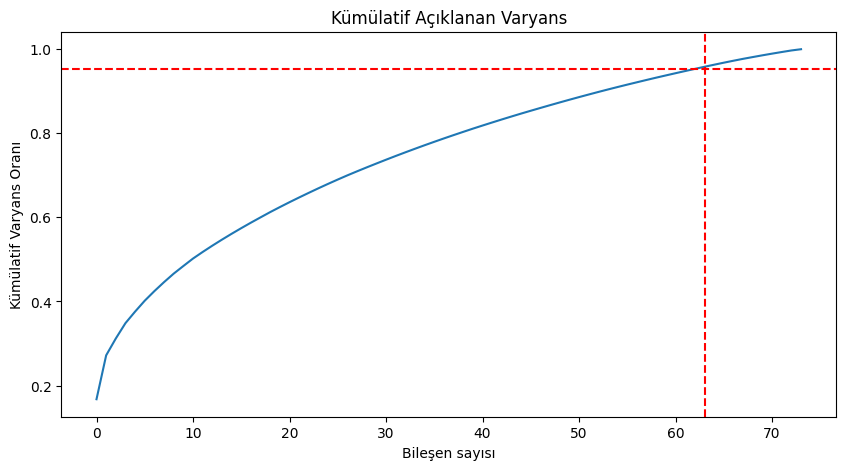

In [ ]:
pca = PCA()
pca.fit(X_smote)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Optimum bileşen sayısı %95 için
optimum_component_count = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Optimum bileşen sayısı ve varyans
print("Optimum bileşen sayısı:", optimum_component_count)
print("Açıklanan toplam varyans oranı:", cumulative_variance[optimum_component_count-1])

# Kümülatif açıklanan varyansı çizdirme
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance)
plt.title('Kümülatif Açıklanan Varyans')
plt.xlabel('Bileşen sayısı')
plt.ylabel('Kümülatif Varyans Oranı')
plt.axvline(x=optimum_component_count, color='r', linestyle='--')
plt.axhline(y=cumulative_variance[optimum_component_count-1], color='r', linestyle='--')
plt.show()

In [ ]:
pca = PCA(n_components=63)

# PCA'yı veriye uygula
X_pca = pca.fit_transform(X_smote)
X_smote = X_pca

## XGBC with ROC

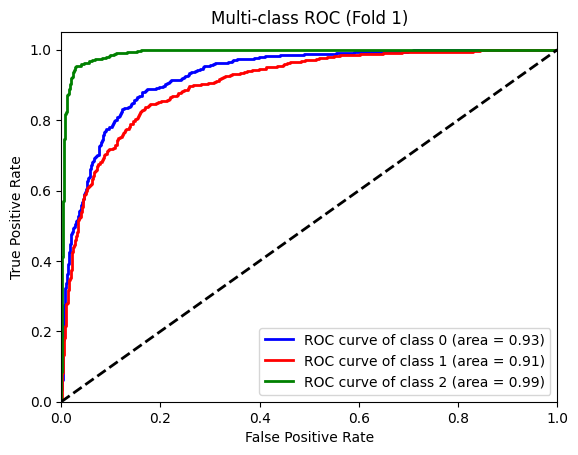

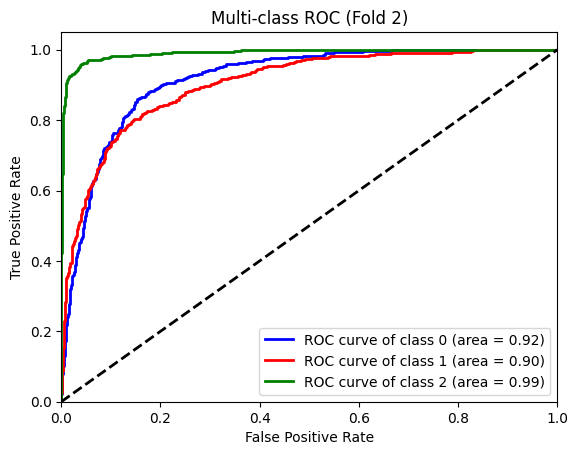

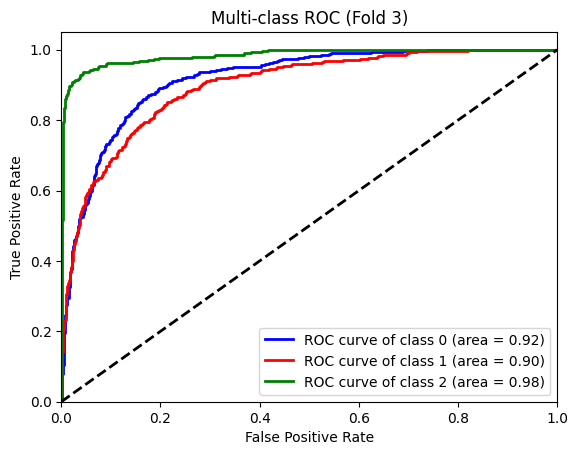

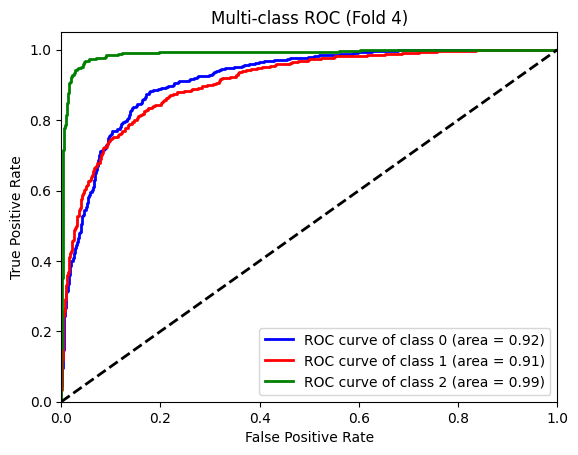

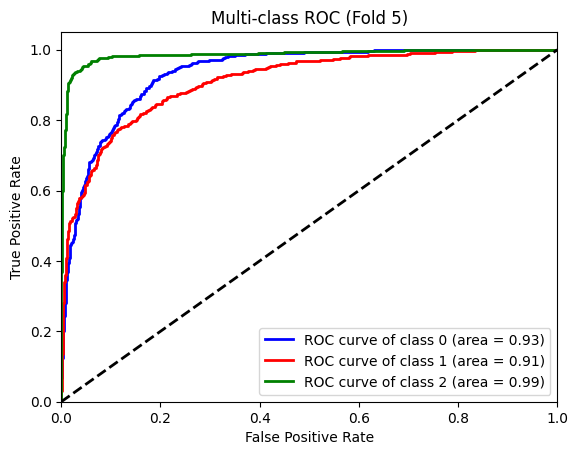

Accuracy Scores:
Fold 1: 0.8260115606936416
Fold 2: 0.8260115606936416
Fold 3: 0.8109826589595376
Fold 4: 0.8329479768786127
Fold 5: 0.8397917871602082
Mean Accuracy: 0.8271491088771283, Standard Deviation Accuracy: 0.009564583827282565

Precision Scores:
Fold 1: 0.8489451740765361
Fold 2: 0.839184239904132
Fold 3: 0.8362308865958974
Fold 4: 0.848963449454824
Fold 5: 0.8493735463666254
Mean Precision: 0.8445394592796029, Standard Deviation Precision: 0.00565793539212182

Recall Scores:
Fold 1: 0.7895953757225433
Fold 2: 0.8017341040462428
Fold 3: 0.7786127167630058
Fold 4: 0.7965317919075144
Fold 5: 0.7998843262001156
Mean Recall: 0.7932716629278843, Standard Deviation Recall: 0.008418651394117533

F1 Scores:
Fold 1: 0.8167963462386222
Fold 2: 0.8198212609400803
Fold 3: 0.8061600056560972
Fold 4: 0.8215979135964492
Fold 5: 0.8228339368954402
Mean F1: 0.817441892665338, Standard Deviation F1: 0.0059950938111823305

AUC Scores:
Fold 1: 0.9417850780303507
Fold 2: 0.9371939931193227
Fold 3

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = XGBClassifier()

y_smote_bin = label_binarize(y_smote, classes=np.unique(y_smote))
n_classes = y_smote_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for fold, (train_index, test_index) in enumerate(crossValidation.split(X_smote, y_smote)):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote_bin[train_index], y_smote_bin[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    y_score = model.predict_proba(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, y_score, multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test.argmax(axis=1), predictions.argmax(axis=1)))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green'])
    plt.figure(fold+1)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-class ROC (Fold {fold+1})')
    plt.legend(loc="lower right")
    plt.show()

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

## Random Forest

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = RandomForestClassifier()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.8404624277456647
Fold 2: 0.8144508670520231
Fold 3: 0.8341040462427746
Fold 4: 0.8294797687861272
Fold 5: 0.843262001156738
Mean Accuracy: 0.8323518221966655, Standard Deviation Accuracy: 0.010164419337114277

Precision Scores:
Fold 1: 0.8397470230561974
Fold 2: 0.8151968903855126
Fold 3: 0.8350738002650046
Fold 4: 0.8285553926424771
Fold 5: 0.8414706955517042
Mean Precision: 0.8320087603801791, Standard Deviation Precision: 0.00952226986992221

Recall Scores:
Fold 1: 0.8404624277456647
Fold 2: 0.8144508670520231
Fold 3: 0.8341040462427746
Fold 4: 0.8294797687861272
Fold 5: 0.843262001156738
Mean Recall: 0.8323518221966655, Standard Deviation Recall: 0.010164419337114277

F1 Scores:
Fold 1: 0.8400415413736002
Fold 2: 0.8143164739044606
Fold 3: 0.833826560233719
Fold 4: 0.8286584204357966
Fold 5: 0.8420411245280696
Mean F1: 0.8317768240951292, Standard Deviation F1: 0.009924223934110696

AUC Scores:
Fold 1: 0.951436264920735
Fold 2: 0.9403567409043725
Fold 3: 

## Gradient Boosting

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = GradientBoostingClassifier()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.753757225433526
Fold 2: 0.7473988439306358
Fold 3: 0.753757225433526
Fold 4: 0.7491329479768786
Fold 5: 0.7657605552342395
Mean Accuracy: 0.7539613596017611, Standard Deviation Accuracy: 0.006413805887986388

Precision Scores:
Fold 1: 0.7540846510342709
Fold 2: 0.7465200388534823
Fold 3: 0.7545597294043637
Fold 4: 0.7518481767564849
Fold 5: 0.7641610916096798
Mean Precision: 0.7542347375316563, Standard Deviation Precision: 0.0057249087151661085

Recall Scores:
Fold 1: 0.753757225433526
Fold 2: 0.7473988439306358
Fold 3: 0.753757225433526
Fold 4: 0.7491329479768786
Fold 5: 0.7657605552342395
Mean Recall: 0.7539613596017611, Standard Deviation Recall: 0.006413805887986388

F1 Scores:
Fold 1: 0.7536806014640481
Fold 2: 0.7469400213188204
Fold 3: 0.7541416469773767
Fold 4: 0.7502564424036995
Fold 5: 0.7646765437085614
Mean F1: 0.7539390511745012, Standard Deviation F1: 0.005965729016820518

AUC Scores:
Fold 1: 0.9092306196972073
Fold 2: 0.8963181818026825
Fold 3

## Logistic Regression

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = LogisticRegression()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7254335260115607
Fold 2: 0.7202312138728324
Fold 3: 0.7323699421965318
Fold 4: 0.707514450867052
Fold 5: 0.7426257952573742
Mean Accuracy: 0.7256349856410702, Standard Deviation Accuracy: 0.011761312571506392

Precision Scores:
Fold 1: 0.7233180939967351
Fold 2: 0.7215839978059982
Fold 3: 0.7327688458580339
Fold 4: 0.7128386869168515
Fold 5: 0.7401550995685741
Mean Precision: 0.7261329448292385, Standard Deviation Precision: 0.009444676846439959

Recall Scores:
Fold 1: 0.7254335260115607
Fold 2: 0.7202312138728324
Fold 3: 0.7323699421965318
Fold 4: 0.707514450867052
Fold 5: 0.7426257952573742
Mean Recall: 0.7256349856410702, Standard Deviation Recall: 0.011761312571506392

F1 Scores:
Fold 1: 0.7242685669414488
Fold 2: 0.7206716865573457
Fold 3: 0.7324730807875351
Fold 4: 0.7097491813015572
Fold 5: 0.741174009822116
Mean F1: 0.7256673050820006, Standard Deviation F1: 0.010649655509643398

AUC Scores:
Fold 1: 0.886281291480314
Fold 2: 0.8838630899011095
Fold 3:

## DecisionTree

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = DecisionTreeClassifier()

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7161849710982658
Fold 2: 0.7028901734104046
Fold 3: 0.7109826589595376
Fold 4: 0.6971098265895954
Fold 5: 0.7056101792943898
Mean Accuracy: 0.7065555618704387, Standard Deviation Accuracy: 0.00657077539544742

Precision Scores:
Fold 1: 0.7157555258884508
Fold 2: 0.7043865793019205
Fold 3: 0.7118726739838601
Fold 4: 0.696408045326658
Fold 5: 0.702478126952054
Mean Precision: 0.7061801902905886, Standard Deviation Precision: 0.006877623905784848

Recall Scores:
Fold 1: 0.7161849710982658
Fold 2: 0.7028901734104046
Fold 3: 0.7109826589595376
Fold 4: 0.6971098265895954
Fold 5: 0.7056101792943898
Mean Recall: 0.7065555618704387, Standard Deviation Recall: 0.00657077539544742

F1 Scores:
Fold 1: 0.7153464879073572
Fold 2: 0.7032938548293575
Fold 3: 0.7109006449807574
Fold 4: 0.6965587069131699
Fold 5: 0.7038306658537071
Mean F1: 0.7059860720968698, Standard Deviation F1: 0.006519807281993232

AUC Scores:
Fold 1: 0.7871314685560048
Fold 2: 0.7771986191354286
Fold 3:

## ANN

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix for label 0:
[[1049  104]
 [ 155  422]]


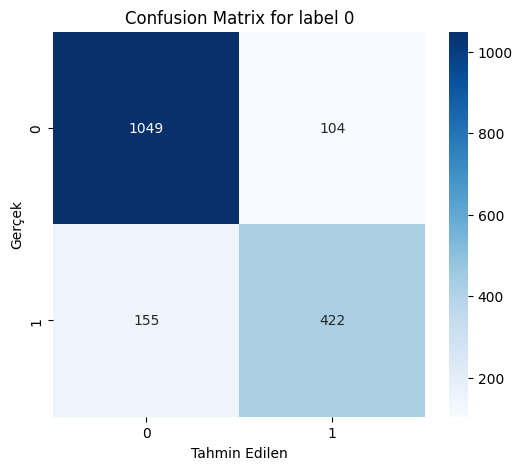

Confusion Matrix for label 1:
[[1016  138]
 [ 138  438]]


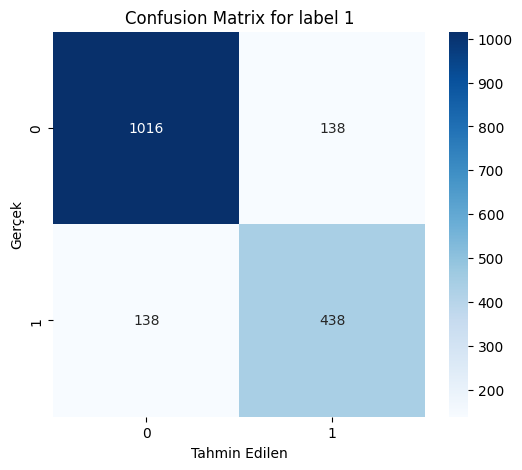

Confusion Matrix for label 2:
[[1094   59]
 [  22  555]]


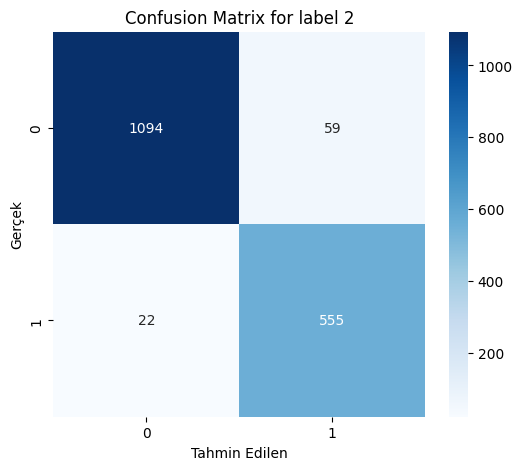

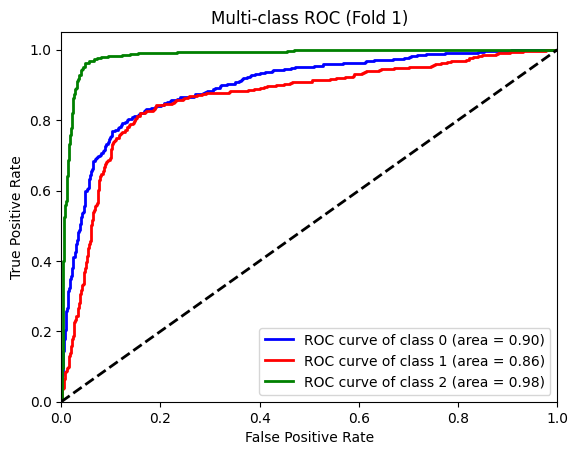

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix for label 0:
[[1041  112]
 [ 135  442]]


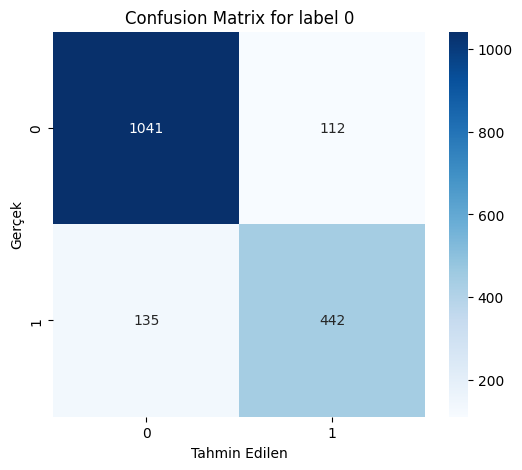

Confusion Matrix for label 1:
[[1000  153]
 [ 130  447]]


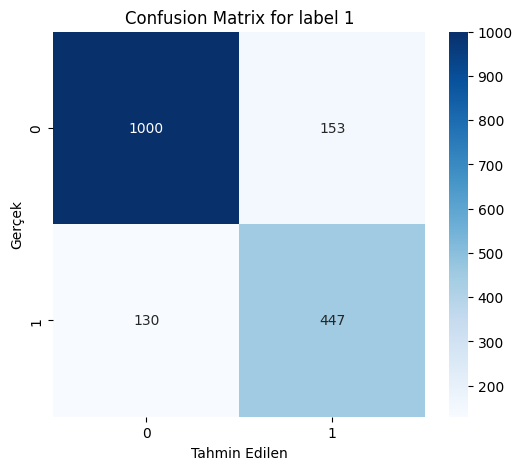

Confusion Matrix for label 2:
[[1122   32]
 [  31  545]]


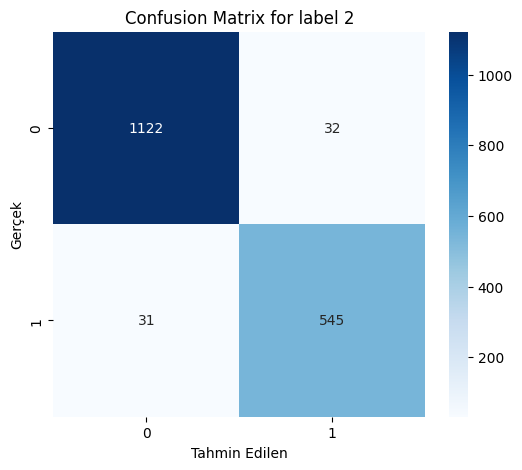

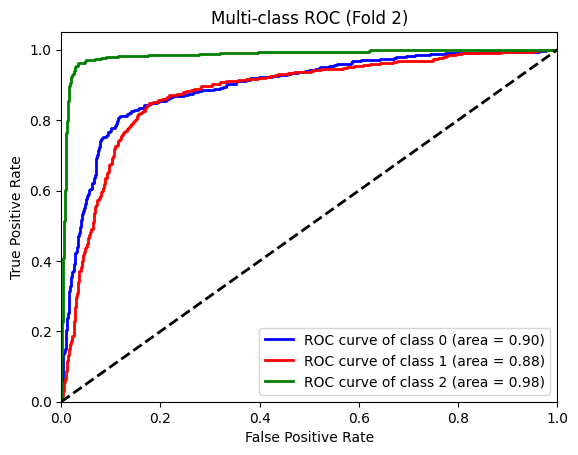

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix for label 0:
[[1036  117]
 [ 145  432]]


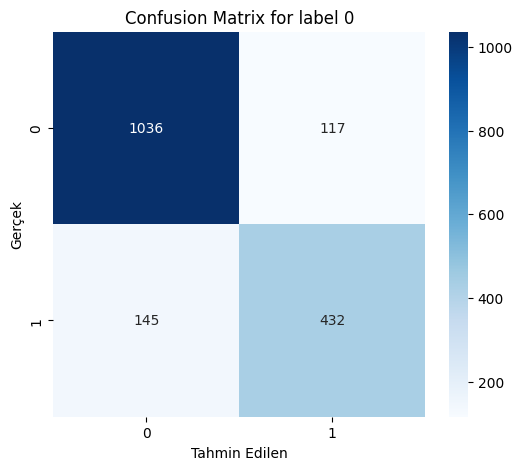

Confusion Matrix for label 1:
[[1008  145]
 [ 135  442]]


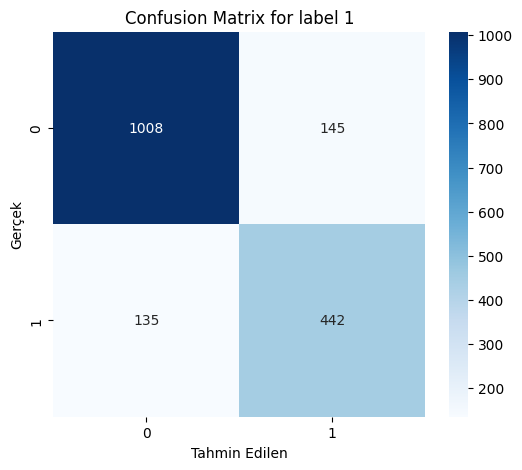

Confusion Matrix for label 2:
[[1120   34]
 [  33  543]]


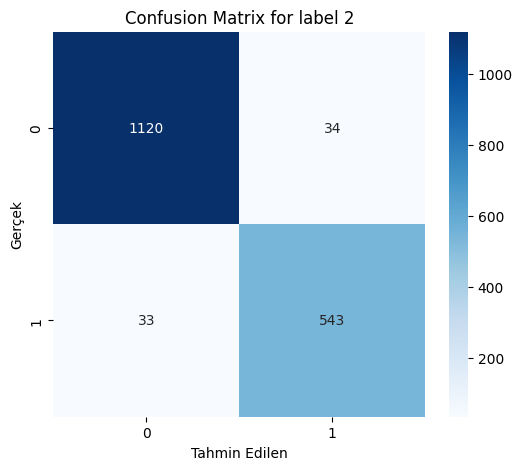

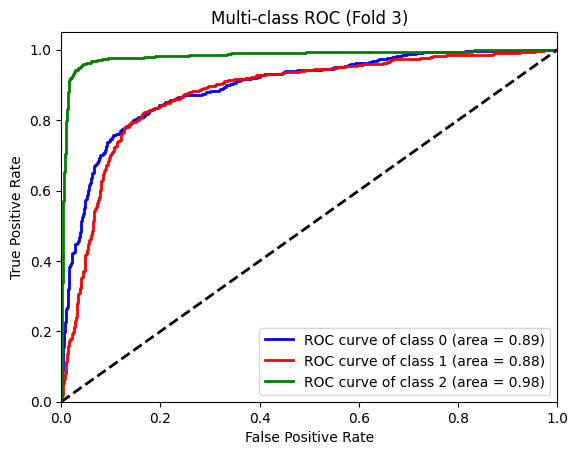

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix for label 0:
[[1058   96]
 [ 159  417]]


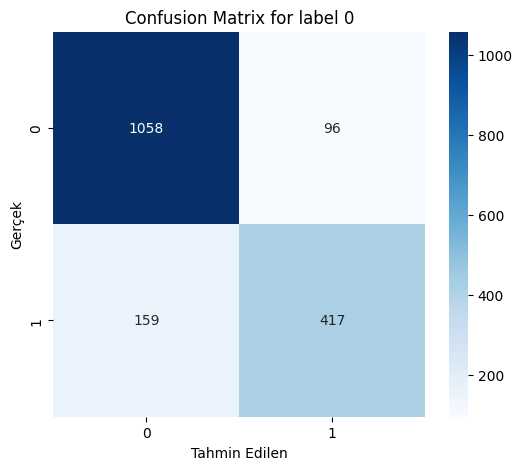

Confusion Matrix for label 1:
[[1013  140]
 [ 129  448]]


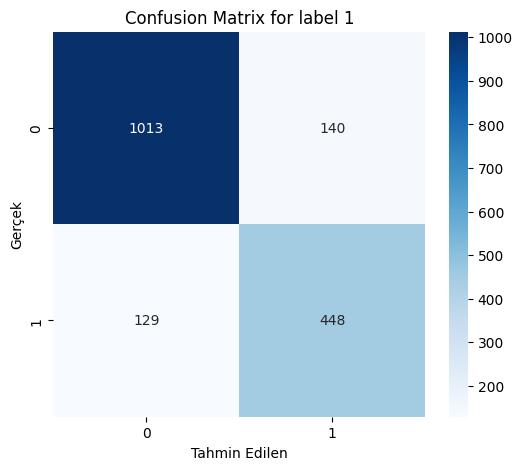

Confusion Matrix for label 2:
[[1115   38]
 [  24  553]]


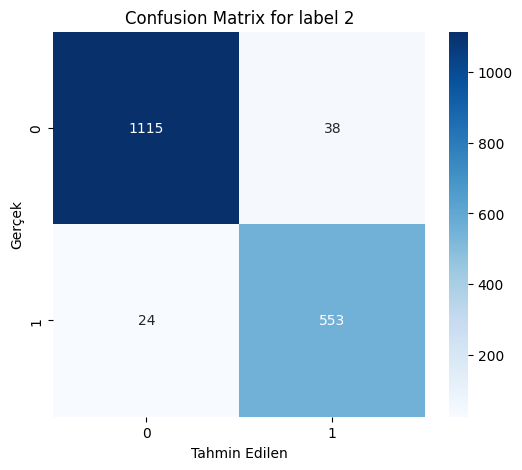

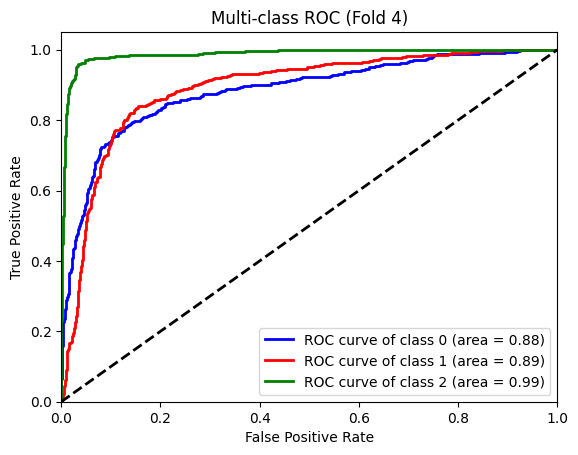

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix for label 0:
[[1067   86]
 [ 181  395]]


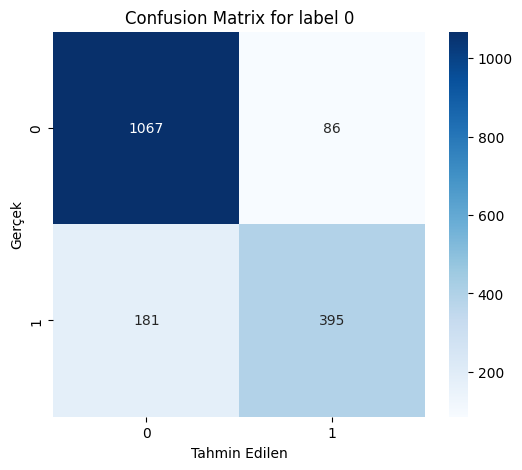

Confusion Matrix for label 1:
[[974 179]
 [119 457]]


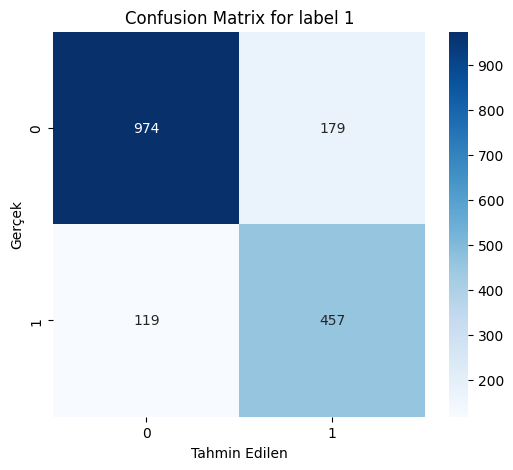

Confusion Matrix for label 2:
[[1108   44]
 [  21  556]]


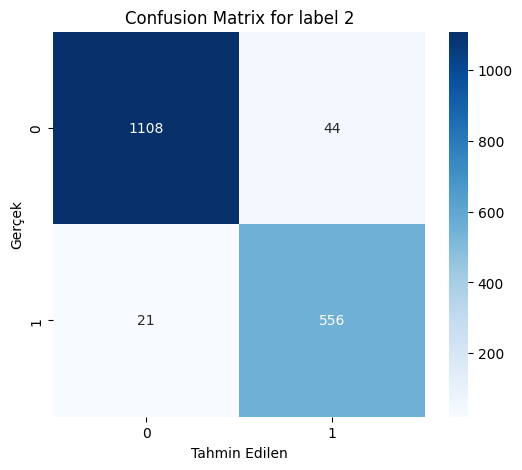

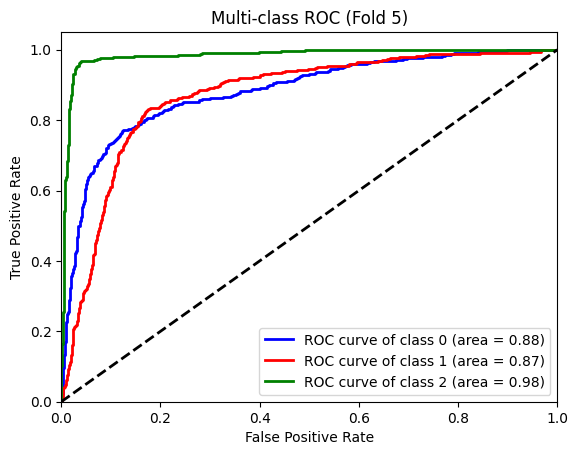

Accuracy Scores:
Fold 1: 0.8254335260115607
Fold 2: 0.8254335260115607
Fold 3: 0.823121387283237
Fold 4: 0.8312138728323699
Fold 5: 0.814921920185078
Mean Accuracy: 0.8240248464647614, Standard Deviation Accuracy: 0.005278832476814221

Precision Scores:
Fold 1: 0.822237990984231
Fold 2: 0.829058173281799
Fold 3: 0.8269143929221825
Fold 4: 0.8368380018147831
Fold 5: 0.8222024361677558
Mean Precision: 0.8274501990341504, Standard Deviation Precision: 0.005398326375393256

Recall Scores:
Fold 1: 0.8179190751445087
Fold 2: 0.8289017341040462
Fold 3: 0.8190751445086705
Fold 4: 0.8196531791907514
Fold 5: 0.8143435511856565
Mean Recall: 0.8199785368267266, Standard Deviation Recall: 0.004827833272124558

F1 Scores:
Fold 1: 0.819231459968335
Fold 2: 0.8287750904598251
Fold 3: 0.8228174884020185
Fold 4: 0.8273210978995141
Fold 5: 0.8155076610435561
Mean F1: 0.8227305595546497, Standard Deviation F1: 0.004940261401996903

AUC Scores:
Fold 1: 0.9141747022921245
Fold 2: 0.9193979595548887
Fold 3: 

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam')

y_smote_bin = label_binarize(y_smote, classes=np.unique(y_smote))
n_classes = y_smote_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for fold, (train_index, test_index) in enumerate(crossValidation.split(X_smote, y_smote)):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote_bin[train_index], y_smote_bin[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    y_score = model.predict_proba(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, y_score, multi_class='ovr', average='weighted'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test.argmax(axis=1), predictions.argmax(axis=1)))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n_classes):
        cm = confusion_matrix(y_test[:, i], predictions[:, i])

        print(f"Confusion Matrix for label {i}:")
        print(cm)

        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix for label {i}")
        plt.ylabel('Gerçek')
        plt.xlabel('Tahmin Edilen')
        plt.show()

    colors = cycle(['blue', 'red', 'green'])
    plt.figure(fold+1)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-class ROC (Fold {fold+1})')
    plt.legend(loc="lower right")
    plt.show()

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

## AdaBoost

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.7468208092485549
Fold 2: 0.7323699421965318
Fold 3: 0.7312138728323699
Fold 4: 0.7121387283236994
Fold 5: 0.7530364372469636
Mean Accuracy: 0.7351159579696238, Standard Deviation Accuracy: 0.014204696929096747

Precision Scores:
Fold 1: 0.7539137467202386
Fold 2: 0.7377240564963492
Fold 3: 0.7370487066281903
Fold 4: 0.7175856418939133
Fold 5: 0.7572223348936032
Mean Precision: 0.7406988973264589, Standard Deviation Precision: 0.014170761308581204

Recall Scores:
Fold 1: 0.7468208092485549
Fold 2: 0.7323699421965318
Fold 3: 0.7312138728323699
Fold 4: 0.7121387283236994
Fold 5: 0.7530364372469636
Mean Recall: 0.7351159579696238, Standard Deviation Recall: 0.014204696929096747

F1 Scores:
Fold 1: 0.7494198787551926
Fold 2: 0.7345235851427658
Fold 3: 0.7336219180552859
Fold 4: 0.7143872266738714
Fold 5: 0.7545326411917531
Mean F1: 0.7372970499637738, Standard Deviation F1: 0.014071867592588813

AUC Scores:
Fold 1: 0.8775821982622826
Fold 2: 0.8805656848123408
Fol

## LDA

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = LDA(solver='svd')

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.723121387283237
Fold 2: 0.7173410404624277
Fold 3: 0.7086705202312139
Fold 4: 0.6872832369942197
Fold 5: 0.7252747252747253
Mean Accuracy: 0.7123381820491648, Standard Deviation Accuracy: 0.01378304953896087

Precision Scores:
Fold 1: 0.7347329679642408
Fold 2: 0.7273213594758221
Fold 3: 0.7199553465639098
Fold 4: 0.70081312185924
Fold 5: 0.7362539397701378
Mean Precision: 0.7238153471266701, Standard Deviation Precision: 0.01288570623515529

Recall Scores:
Fold 1: 0.723121387283237
Fold 2: 0.7173410404624277
Fold 3: 0.7086705202312139
Fold 4: 0.6872832369942197
Fold 5: 0.7252747252747253
Mean Recall: 0.7123381820491648, Standard Deviation Recall: 0.01378304953896087

F1 Scores:
Fold 1: 0.726993692899509
Fold 2: 0.7209384222266417
Fold 3: 0.7126847323199008
Fold 4: 0.6917358406110231
Fold 5: 0.728980279399195
Mean F1: 0.7162665934912538, Standard Deviation F1: 0.013513859708720965

AUC Scores:
Fold 1: 0.8867719554225402
Fold 2: 0.8831350514996809
Fold 3: 0.88

## SVC

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = SVC(C=1.0, kernel='rbf', gamma='scale',probability=True)

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

Accuracy Scores:
Fold 1: 0.8260115606936416
Fold 2: 0.8040462427745665
Fold 3: 0.8167630057803468
Fold 4: 0.8034682080924855
Fold 5: 0.8282244071717756
Mean Accuracy: 0.8157026849025633, Standard Deviation Accuracy: 0.010485664451303976

Precision Scores:
Fold 1: 0.825395831097711
Fold 2: 0.8039016297321242
Fold 3: 0.815317001725278
Fold 4: 0.8039589304727085
Fold 5: 0.8273152518374222
Mean Precision: 0.8151777289730487, Standard Deviation Precision: 0.010047490463744101

Recall Scores:
Fold 1: 0.8260115606936416
Fold 2: 0.8040462427745665
Fold 3: 0.8167630057803468
Fold 4: 0.8034682080924855
Fold 5: 0.8282244071717756
Mean Recall: 0.8157026849025633, Standard Deviation Recall: 0.010485664451303976

F1 Scores:
Fold 1: 0.825036932427183
Fold 2: 0.8039712881242097
Fold 3: 0.8159105280698015
Fold 4: 0.8036957319492852
Fold 5: 0.8275757387931668
Mean F1: 0.8152380438727291, Standard Deviation F1: 0.010088150647988797

AUC Scores:
Fold 1: 0.941464401466782
Fold 2: 0.9364119629072638
Fold 3:

## Stochastic Gradient Descent (SGD)

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

model = SGDClassifier(loss='log', penalty='l2', alpha=0.0001)

for train_index, test_index in crossValidation.split(X_smote, y_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    performance_metrics['Accuracy'].append(accuracy_score(y_test, predictions))
    performance_metrics['Precision'].append(precision_score(y_test, predictions, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, predictions, average='weighted'))
    performance_metrics['F1'].append(f1_score(y_test, predictions, average='weighted'))
    performance_metrics['AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    performance_metrics['MCC'].append(matthews_corrcoef(y_test, predictions))

for metric, values in performance_metrics.items():
    print(f"{metric} Scores:")
    for i, score in enumerate(values):
        print(f"Fold {i + 1}: {score}")
    print(f"Mean {metric}: {np.mean(values)}, Standard Deviation {metric}: {np.std(values)}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Accuracy Scores:
Fold 1: 0.708092485549133
Fold 2: 0.7046242774566474
Fold 3: 0.7104046242774567
Fold 4: 0.7023121387283237
Fold 5: 0.7264314632735686
Mean Accuracy: 0.7103729978570258, Standard Deviation Accuracy: 0.008498250223260407

Precision Scores:
Fold 1: 0.7093168521482989
Fold 2: 0.6995633971709913
Fold 3: 0.7121920372845585
Fold 4: 0.6995352866802294
Fold 5: 0.7221324295595378
Mean Precision: 0.7085480005687231, Standard Deviation Precision: 0.008489510671347823

Recall Scores:
Fold 1: 0.708092485549133
Fold 2: 0.7046242774566474
Fold 3: 0.7104046242774567
Fold 4: 0.7023121387283237
Fold 5: 0.7264314632735686
Mean Recall: 0.7103729978570258, Standard Deviation Recall: 0.008498250223260407

F1 Scores:
Fold 1: 0.7086755878389527
Fold 2: 0.7000568500179153
Fold 3: 0.7112371994988328
Fold 4: 0.7003659651240308
Fold 5: 0.7237141970705636
Mean F1: 0.7088099599100591, Standard Deviation F1: 0.008671376060831244

AUC Scores:
Fold 1: 0.8771957326671543
Fold 2: 0.8690429620466139
Fold 

# **Binary Form Classification**




In [ ]:
df2

Q11_1  Q11_2  Q11_3  Q11_4  Q11_5  Q11_6  Q11_7  Q11_8  Q11_9  Q11_10  \
0       0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0    0.0     0.0   
1       1.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0     1.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
3       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
4       1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0    0.0     1.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
5296    0.0    1.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0     0.0   
5297    0.0    1.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0     0.0   
5298    0.0    1.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0     0.0   
5299    1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0   
5300    0.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0   

      ...  Q18_17  Q18_18  Q18_19  Q18_20  Q18_21  Q18_22  Q18_23  Q20  Q21  \
0     ...     5.0     5.0     5.0     5.0     5.0     5.0     5.0  3.0  3.0   
1     ...     4.0     4.0     3.6     2.6     4.0     2.0     4.0  4.0  1.0   
2     ...     2.4     3.8     3.4     2.8     2.8     3.0     3.6  3.0  3.0   
3     ...     4.0     4.0     4.0     4.0     4.0     4.0     4.0  3.0  3.0   
4     ...     5.0     1.0     5.0     3.0     5.0     3.0     3.0  3.0  1.0   
...   ...     ...     ...     ...     ...     ...     ...     ...  ...  ...   
5296  ...     3.0     2.0     5.0     4.0     4.0     5.0     2.0  4.0  1.0   
5297  ...     2.0     2.0     3.0     3.0     2.0     1.0     1.0  1.0  3.0   
5298  ...     2.8     1.8     3.6     1.8     2.8     2.4     2.4  3.0  3.0   
5299  ...     4.0     1.0     5.0     4.0     5.0     4.0     5.0  5.0  2.0   
5300  ...     1.0     3.0     4.0     5.0     3.0     2.0     3.0  2.0  3.0   

      Q16  
0     0.0  
1     0.0  
2     2.0  
3     1.0  
4     0.0  
...   ...  
5296  0.0  
5297  1.0  
5298  0.0  
5299  0.0  
5300  0.0  

[5301 rows x 75 columns]

In [ ]:
binaryData = 0
binaryData = df2[df2['Q16']!=1]

binaryData.loc[:, 'Q16'] = binaryData['Q16'].map({0: 1, 2: 0})
binaryData.shape

<ipython-input-69-681e48e1d15d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binaryData.loc[:, 'Q16'] = binaryData['Q16'].map({0: 1, 2: 0})
<ipython-input-69-681e48e1d15d>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  binaryData.loc[:, 'Q16'] = binaryData['Q16'].map({0: 1, 2: 0})


(3775, 75)

1    2883
0     892
Name: Q16, dtype: int64


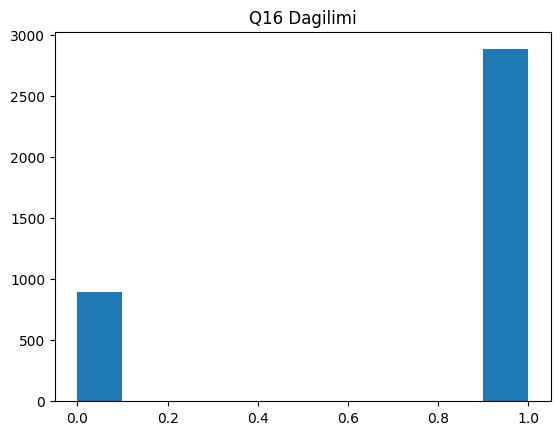

In [ ]:
class_distribution = binaryData['Q16'].value_counts()
print(class_distribution)

plt.hist(binaryData['Q16'])
plt.title('Q16 Dagilimi')
plt.show()

## without PCA

In [ ]:
X = binaryData.drop('Q16', axis=1)
y = binaryData['Q16']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape: ",X_train.shape,"X_test shape: ",X_test.shape)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

crossValidation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X_train shape:  (3020, 74) X_test shape:  (755, 74)


Çalıştırılan model: DecisionTreeClassifier
Çalıştırılan model: RandomForestClassifier
Çalıştırılan model: GradientBoostingClassifier
Çalıştırılan model: AdaBoostClassifier
Çalıştırılan model: SVC
Çalıştırılan model: KNeighborsClassifier
Çalıştırılan model: MLPClassifier
Çalıştırılan model: XGBClassifier
Çalıştırılan model: LogisticRegression
Çalıştırılan model: SGDClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

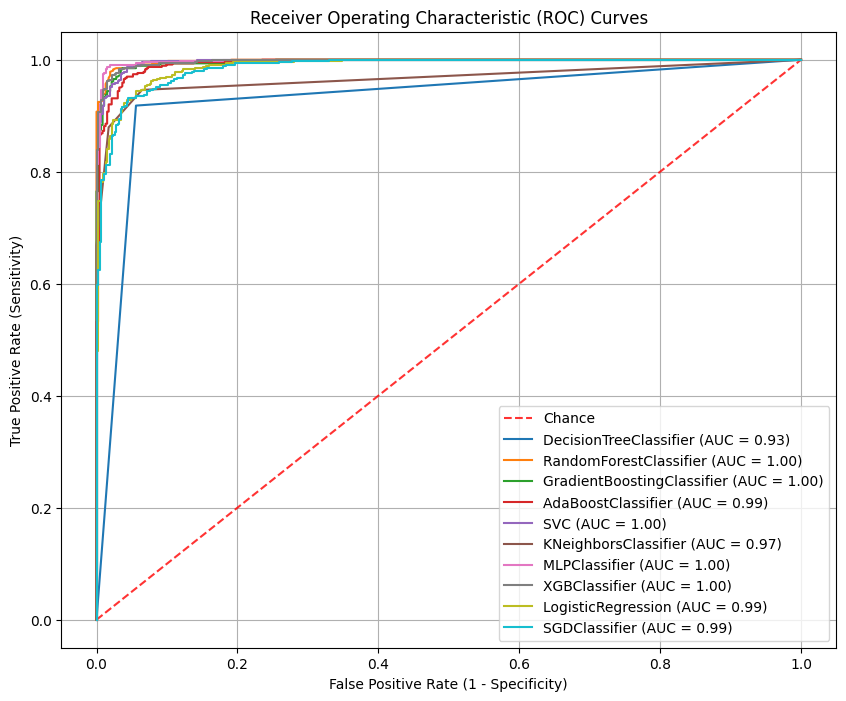


Average Performance Metrics for DecisionTreeClassifier:
Accuracy: 0.9250
Precision: 0.9253
Recall: 0.9250
F1: 0.9250
AUC: 0.9250
MCC: 0.8503

Average Performance Metrics for RandomForestClassifier:
Accuracy: 0.9603
Precision: 0.9604
Recall: 0.9603
F1: 0.9603
AUC: 0.9932
MCC: 0.9208

Average Performance Metrics for GradientBoostingClassifier:
Accuracy: 0.9509
Precision: 0.9509
Recall: 0.9509
F1: 0.9509
AUC: 0.9914
MCC: 0.9018

Average Performance Metrics for AdaBoostClassifier:
Accuracy: 0.9489
Precision: 0.9490
Recall: 0.9489
F1: 0.9489
AUC: 0.9889
MCC: 0.8979

Average Performance Metrics for SVC:
Accuracy: 0.9588
Precision: 0.9590
Recall: 0.9588
F1: 0.9588
AUC: 0.9901
MCC: 0.9179

Average Performance Metrics for KNeighborsClassifier:
Accuracy: 0.8819
Precision: 0.9004
Recall: 0.8819
F1: 0.8805
AUC: 0.9613
MCC: 0.7820

Average Performance Metrics for MLPClassifier:
Accuracy: 0.9662
Precision: 0.9665
Recall: 0.9662
F1: 0.9662
AUC: 0.9919
MCC: 0.9327

Average Performance Metrics for XGB

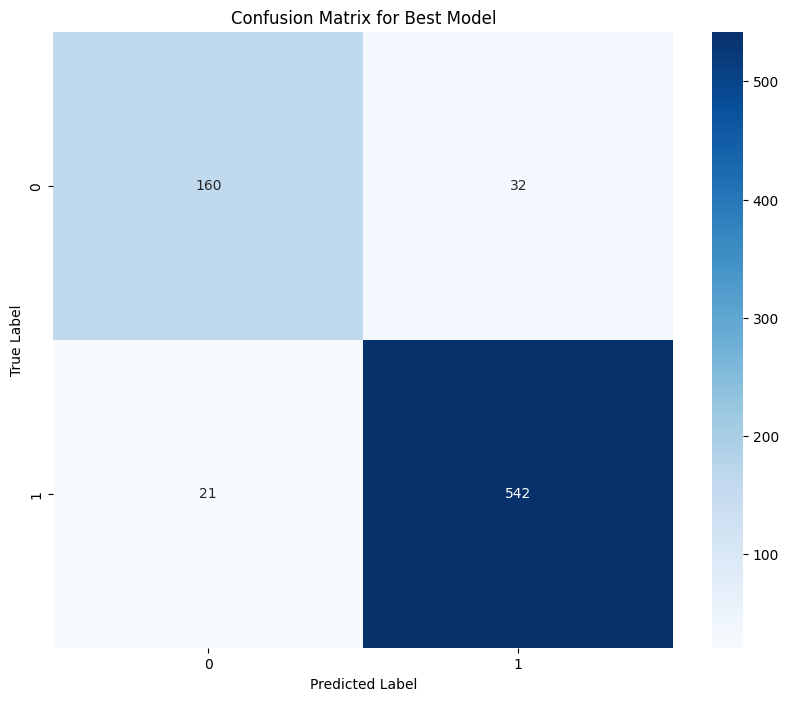

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam'),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LogisticRegression(),
    SGDClassifier(loss='log')
]

best_model = models[0]
best_auc = 0
average_performance_metrics = {}

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance', alpha=.8)


for model in models:
    temp_metrics = {metric: [] for metric in performance_metrics}
    print(f"Çalıştırılan model: {type(model).__name__}")

    for train_index, test_index in crossValidation.split(X_train_smote, y_train_smote):
        X_train_fold, X_test_fold = X_train_smote[train_index], X_train_smote[test_index]
        y_train_fold, y_test_fold = y_train_smote[train_index], y_train_smote[test_index]

        model.fit(X_train_fold, y_train_fold)
        predictions = model.predict(X_test_fold)
        pos_probs = model.predict_proba(X_test_fold)[:, 1]


        temp_metrics['Accuracy'].append(accuracy_score(y_test_fold, predictions))
        temp_metrics['Precision'].append(precision_score(y_test_fold, predictions, average='weighted'))
        temp_metrics['Recall'].append(recall_score(y_test_fold, predictions, average='weighted'))
        temp_metrics['F1'].append(f1_score(y_test_fold, predictions, average='weighted'))
        temp_metrics['AUC'].append(roc_auc_score(y_test_fold, pos_probs))
        temp_metrics['MCC'].append(matthews_corrcoef(y_test_fold, predictions))

    average_performance_metrics[type(model).__name__] = {metric: np.mean(values) for metric, values in temp_metrics.items()}
    mean_auc = np.mean(temp_metrics['AUC'])
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_model = model

    # ROC FPR ve TPR
    fpr, tpr, _ = roc_curve(y_test_fold, pos_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')


plt.legend(loc='lower right')
plt.grid(True)
plt.show()

for model_name, metrics in average_performance_metrics.items():
    print(f"\nAverage Performance Metrics for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

best_model.fit(X_train_smote, y_train_smote)
test_predictions = best_model.predict(X_test)
test_pos_probs = best_model.predict_proba(X_test)[:, 1]

# Test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_auc = roc_auc_score(y_test, test_pos_probs)
test_mcc = matthews_corrcoef(y_test, test_predictions)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Test set cm
print(f"\nTest Set Metrics for the Best Model ({type(best_model).__name__}):")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1: {test_f1}")
print(f"AUC: {test_auc}")
print(f"MCC: {test_mcc}")

plt.figure(figsize=(10, 8))
sns.heatmap(test_confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


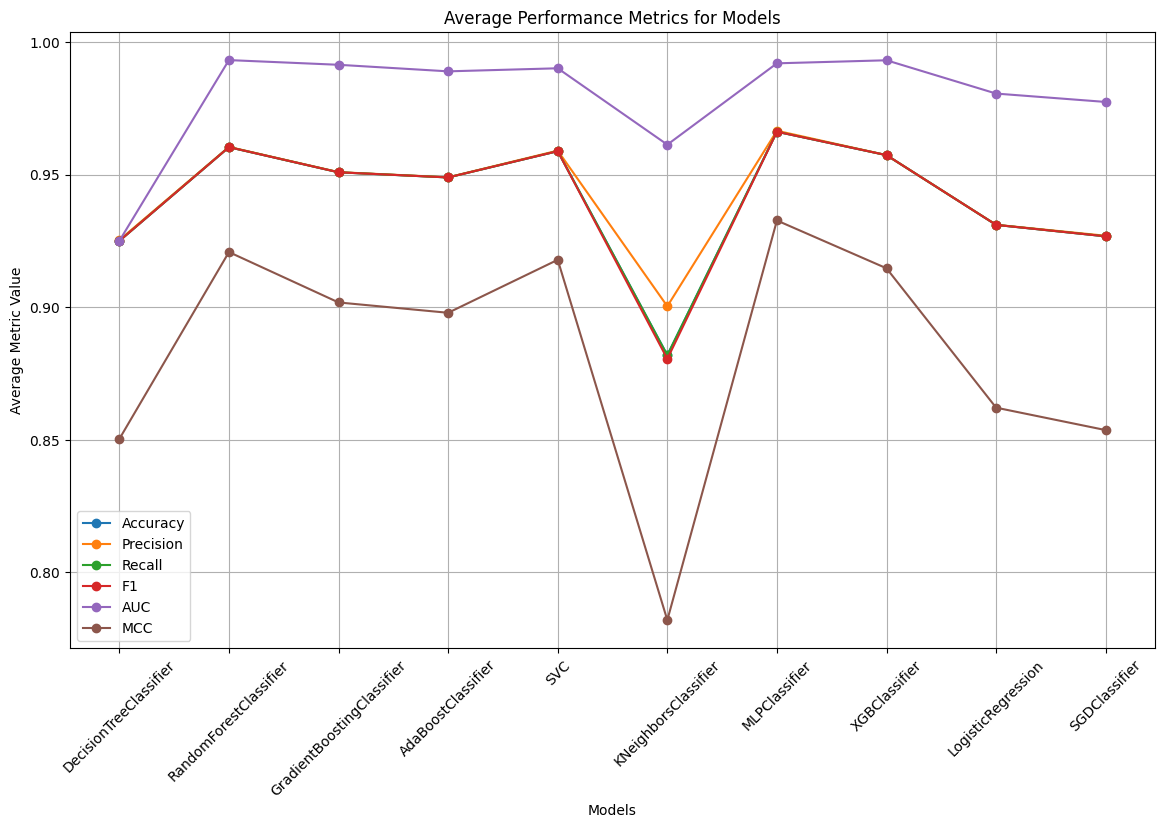

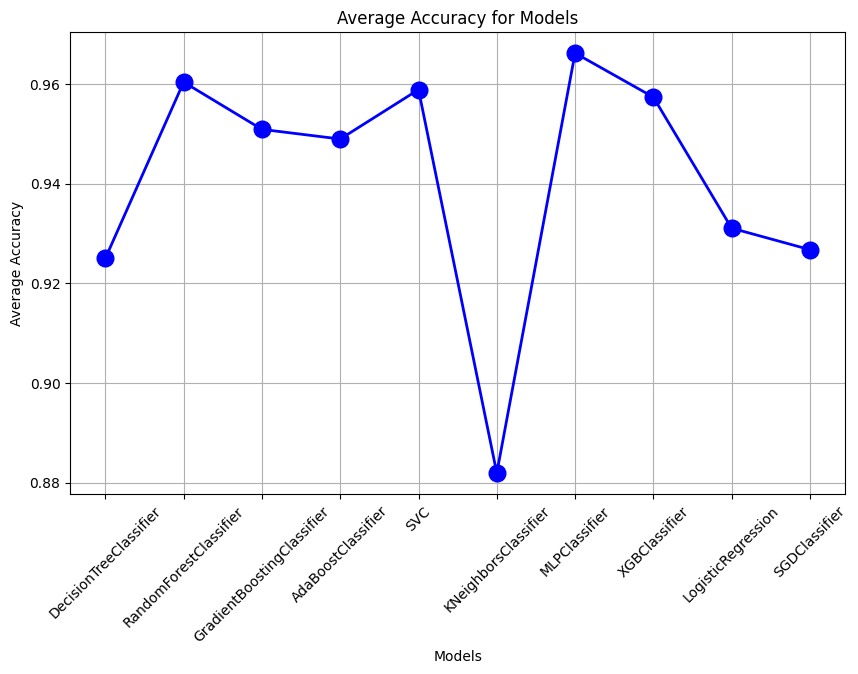

In [ ]:
plt.figure(figsize=(14, 8))
for metric in performance_metrics:
    values = [metrics[metric] for metrics in average_performance_metrics.values()]
    plt.plot(list(average_performance_metrics.keys()), values, label=metric, marker='o')
plt.title('Average Performance Metrics for Models')
plt.xlabel('Models')
plt.ylabel('Average Metric Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tüm modeller için ortalama doğruluk değerlerini çizgi grafik olarak çizme
plt.figure(figsize=(10, 6))
accuracy_values = [metrics['Accuracy'] for metrics in average_performance_metrics.values()]
plt.plot(list(average_performance_metrics.keys()), accuracy_values, color='b', marker='o', linestyle='-', linewidth=2, markersize=12)
plt.title('Average Accuracy for Models')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## with PCA

In [ ]:
X = binaryData.drop('Q16', axis=1)
y = binaryData['Q16']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Optimum bileşen sayısı: 63
Açıklanan toplam varyans oranı: 0.9533495934940729


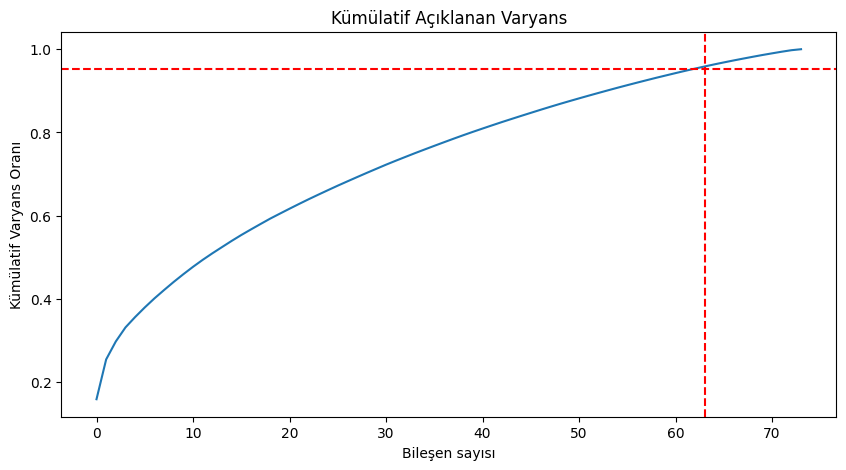

In [ ]:
pca = PCA()
pca.fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Optimum bileşen sayısı %95 için
optimum_component_count = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Optimum bileşen sayısı ve varyans
print("Optimum bileşen sayısı:", optimum_component_count)
print("Açıklanan toplam varyans oranı:", cumulative_variance[optimum_component_count-1])

plt.figure(figsize=(10,5))
plt.plot(cumulative_variance)
plt.title('Kümülatif Açıklanan Varyans')
plt.xlabel('Bileşen sayısı')
plt.ylabel('Kümülatif Varyans Oranı')
plt.axvline(x=optimum_component_count, color='r', linestyle='--')
plt.axhline(y=cumulative_variance[optimum_component_count-1], color='r', linestyle='--')
plt.show()

In [ ]:
pca = PCA(n_components=63)

X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
print("X_train shape: ",X_train.shape,"X_test shape: ",X_test.shape)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

crossValidation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X_train shape:  (3020, 63) X_test shape:  (755, 63)


Çalıştırılan model: DecisionTreeClassifier
Çalıştırılan model: RandomForestClassifier
Çalıştırılan model: GradientBoostingClassifier
Çalıştırılan model: AdaBoostClassifier
Çalıştırılan model: SVC
Çalıştırılan model: KNeighborsClassifier
Çalıştırılan model: MLPClassifier
Çalıştırılan model: XGBClassifier
Çalıştırılan model: LogisticRegression
Çalıştırılan model: SGDClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

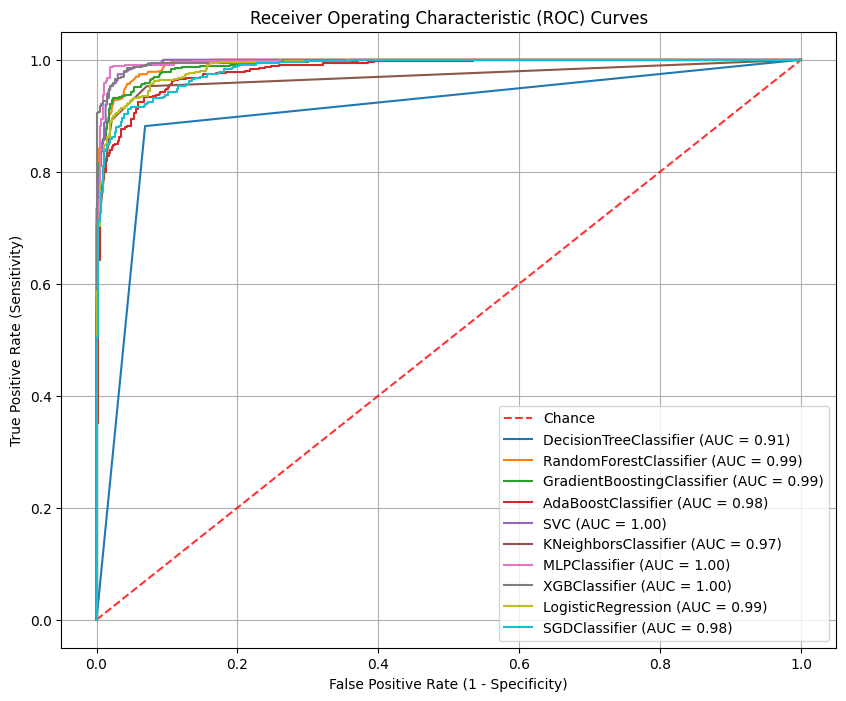


Average Performance Metrics for DecisionTreeClassifier:
Accuracy: 0.9028
Precision: 0.9035
Recall: 0.9028
F1: 0.9028
AUC: 0.9028
MCC: 0.8063

Average Performance Metrics for RandomForestClassifier:
Accuracy: 0.9552
Precision: 0.9553
Recall: 0.9552
F1: 0.9552
AUC: 0.9916
MCC: 0.9105

Average Performance Metrics for GradientBoostingClassifier:
Accuracy: 0.9358
Precision: 0.9360
Recall: 0.9358
F1: 0.9358
AUC: 0.9846
MCC: 0.8718

Average Performance Metrics for AdaBoostClassifier:
Accuracy: 0.9153
Precision: 0.9155
Recall: 0.9153
F1: 0.9153
AUC: 0.9758
MCC: 0.8308

Average Performance Metrics for SVC:
Accuracy: 0.9595
Precision: 0.9597
Recall: 0.9595
F1: 0.9595
AUC: 0.9896
MCC: 0.9192

Average Performance Metrics for KNeighborsClassifier:
Accuracy: 0.8847
Precision: 0.9007
Recall: 0.8847
F1: 0.8835
AUC: 0.9615
MCC: 0.7853

Average Performance Metrics for MLPClassifier:
Accuracy: 0.9644
Precision: 0.9652
Recall: 0.9644
F1: 0.9644
AUC: 0.9915
MCC: 0.9296

Average Performance Metrics for XGB

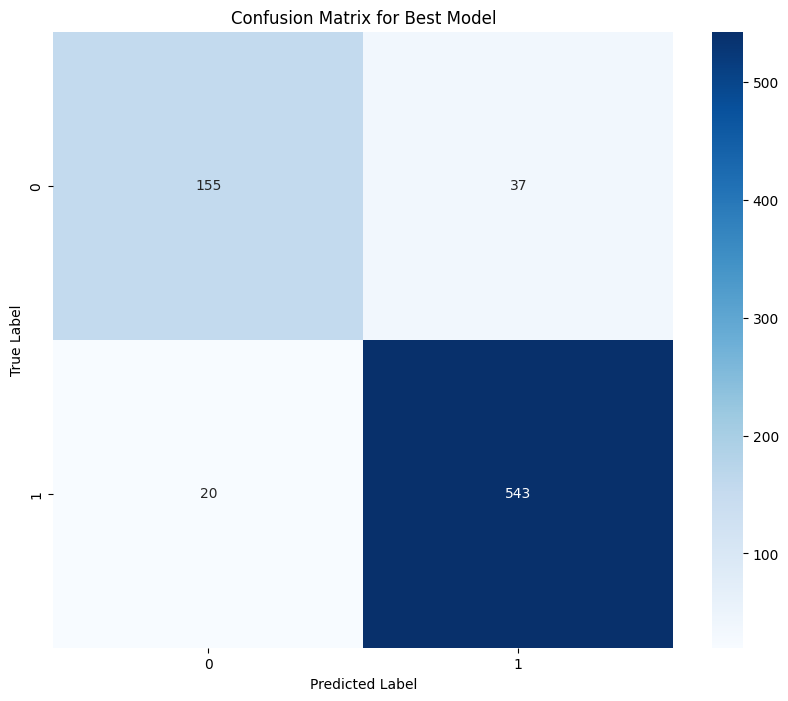

In [ ]:
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': [],
    'MCC': []
}

models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam'),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LogisticRegression(),
    SGDClassifier(loss='log')
]

best_model = models[0]
best_auc = 0
average_performance_metrics = {}

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance', alpha=.8)


for model in models:
    temp_metrics = {metric: [] for metric in performance_metrics}
    print(f"Çalıştırılan model: {type(model).__name__}")

    for train_index, test_index in crossValidation.split(X_train_smote, y_train_smote):
        X_train_fold, X_test_fold = X_train_smote[train_index], X_train_smote[test_index]
        y_train_fold, y_test_fold = y_train_smote[train_index], y_train_smote[test_index]

        model.fit(X_train_fold, y_train_fold)
        predictions = model.predict(X_test_fold)
        pos_probs = model.predict_proba(X_test_fold)[:, 1]


        temp_metrics['Accuracy'].append(accuracy_score(y_test_fold, predictions))
        temp_metrics['Precision'].append(precision_score(y_test_fold, predictions, average='weighted'))
        temp_metrics['Recall'].append(recall_score(y_test_fold, predictions, average='weighted'))
        temp_metrics['F1'].append(f1_score(y_test_fold, predictions, average='weighted'))
        temp_metrics['AUC'].append(roc_auc_score(y_test_fold, pos_probs))
        temp_metrics['MCC'].append(matthews_corrcoef(y_test_fold, predictions))

    average_performance_metrics[type(model).__name__] = {metric: np.mean(values) for metric, values in temp_metrics.items()}
    mean_auc = np.mean(temp_metrics['AUC'])
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_model = model

    # ROC FPR ve TPR
    fpr, tpr, _ = roc_curve(y_test_fold, pos_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')


plt.legend(loc='lower right')
plt.grid(True)
plt.show()

for model_name, metrics in average_performance_metrics.items():
    print(f"\nAverage Performance Metrics for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

best_model.fit(X_train_smote, y_train_smote)
test_predictions = best_model.predict(X_test)
test_pos_probs = best_model.predict_proba(X_test)[:, 1]

# Test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_auc = roc_auc_score(y_test, test_pos_probs)
test_mcc = matthews_corrcoef(y_test, test_predictions)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Test set cm
print(f"\nTest Set Metrics for the Best Model ({type(best_model).__name__}):")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1: {test_f1}")
print(f"AUC: {test_auc}")
print(f"MCC: {test_mcc}")

plt.figure(figsize=(10, 8))
sns.heatmap(test_confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


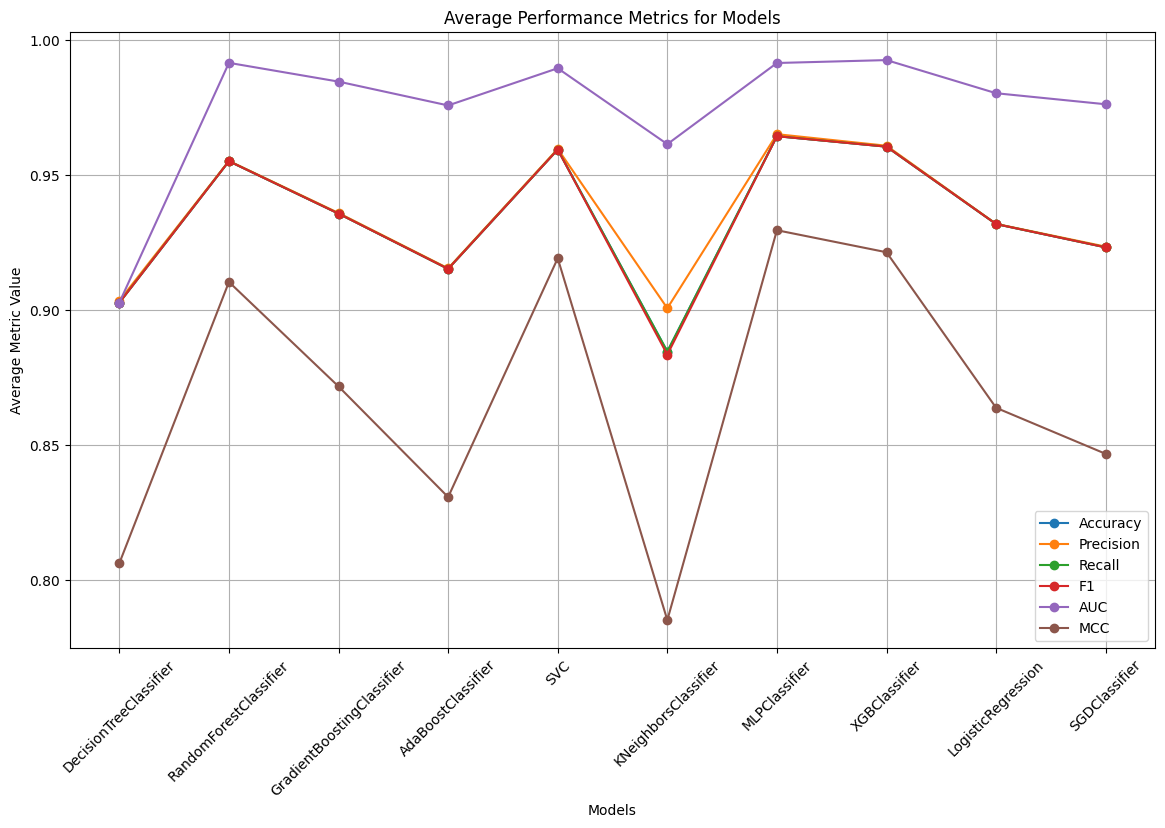

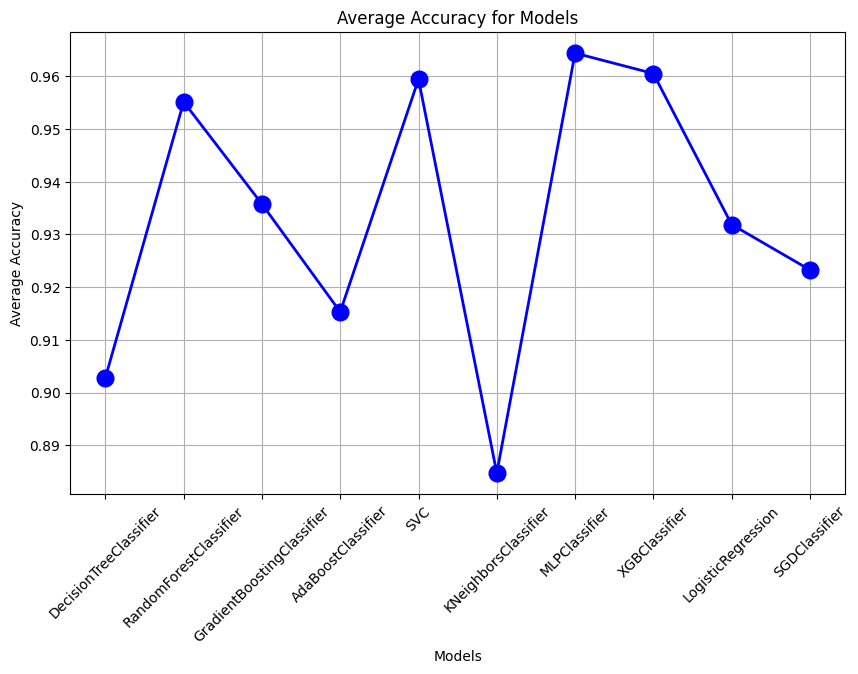

In [ ]:
plt.figure(figsize=(14, 8))
for metric in performance_metrics:
    values = [metrics[metric] for metrics in average_performance_metrics.values()]
    plt.plot(list(average_performance_metrics.keys()), values, label=metric, marker='o')
plt.title('Average Performance Metrics for Models')
plt.xlabel('Models')
plt.ylabel('Average Metric Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tüm modeller için ortalama doğruluk değerlerini çizgi grafik olarak çizme
plt.figure(figsize=(10, 6))
accuracy_values = [metrics['Accuracy'] for metrics in average_performance_metrics.values()]
plt.plot(list(average_performance_metrics.keys()), accuracy_values, color='b', marker='o', linestyle='-', linewidth=2, markersize=12)
plt.title('Average Accuracy for Models')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# D lerin kNN ile dönüstürülmesi ile sınıflandırma

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data.xls'

try:
    data = pd.read_excel(file_path)
    data.replace("?", np.nan, inplace=True)
    data['Q16'].replace('D', np.nan, inplace=True)

except Exception as e:
    error = str(e)

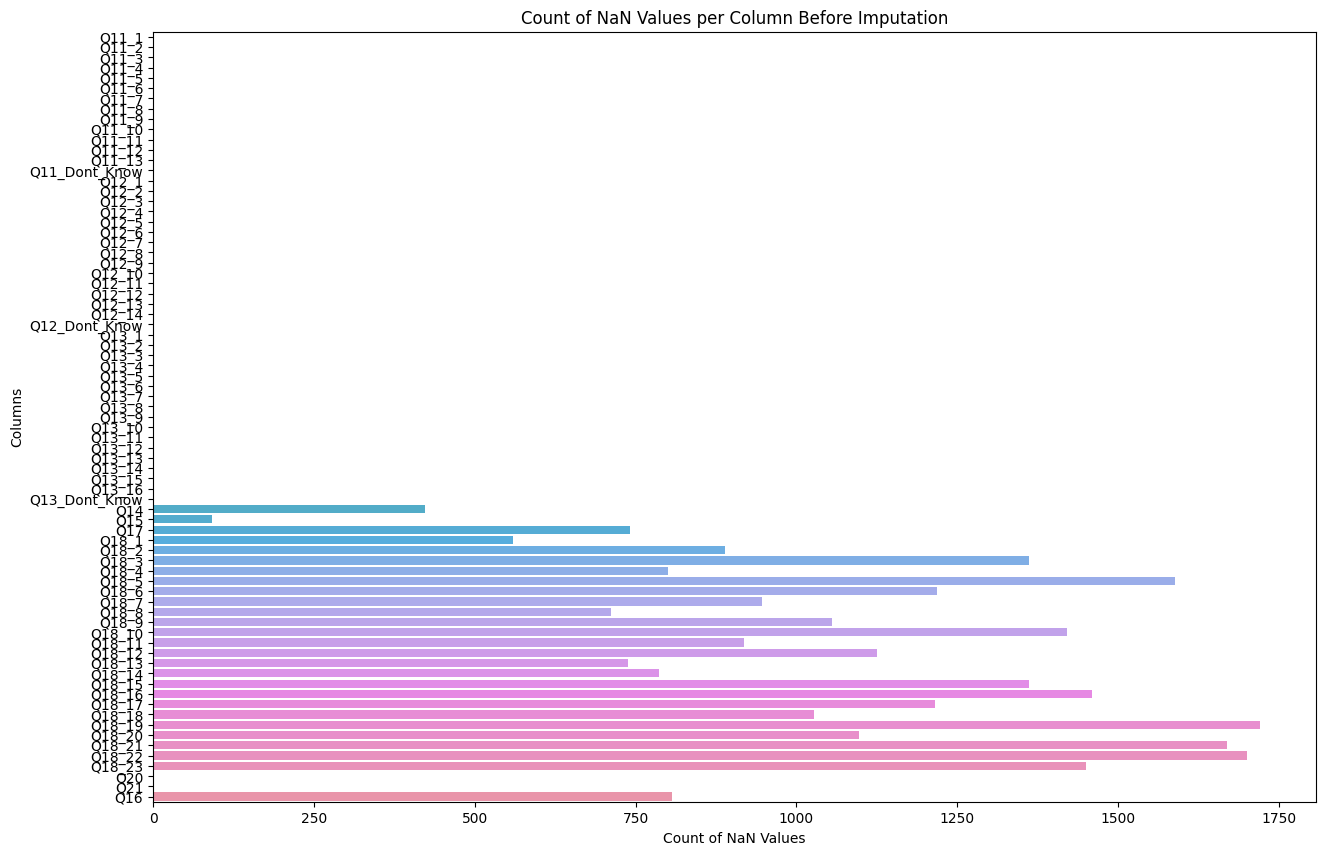

In [8]:
if 'error' in locals():
    print(error)
else:
    missing_values_info_before = data.isnull().sum()
    plt.figure(figsize=(15, 10))
    sns.barplot(x=missing_values_info_before.values, y=missing_values_info_before.index)
    plt.title('Count of NaN Values per Column Before Imputation')
    plt.xlabel('Count of NaN Values')
    plt.ylabel('Columns')
    plt.show()

In [9]:
label_encoder = LabelEncoder()
data['Q16'].fillna('NaN', inplace=True)  # Placeholder for NaN
data['Q16_encoded'] = label_encoder.fit_transform(data['Q16'])
data['Q16_encoded'].replace(label_encoder.transform(['NaN'])[0], np.nan, inplace=True)

In [10]:
    knn_imputer = KNNImputer(n_neighbors=5)
    columns = data.columns
    data_imputed = pd.DataFrame(knn_imputer.fit_transform(data.drop(columns='Q16')), columns=columns.drop('Q16'))

In [11]:
    data_imputed['Q16'] = label_encoder.inverse_transform(data_imputed['Q16_encoded'].astype(int))
    data_imputed['Q16'].replace('NaN', np.nan, inplace=True)  # Back to NaN
    data_imputed.drop(columns='Q16_encoded', inplace=True)

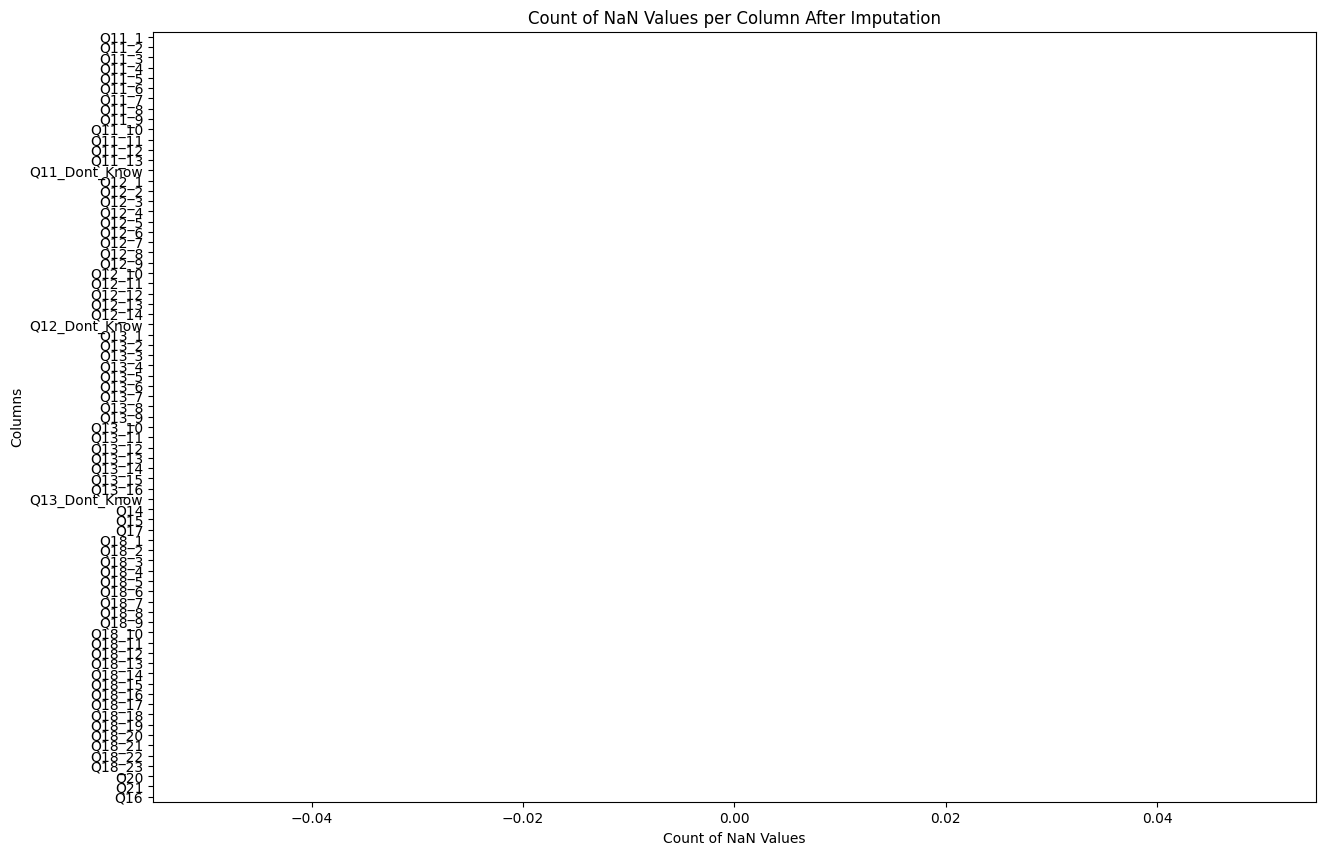

First few rows after KNN imputation:
    Q11_1  Q11_2  Q11_3  Q11_4  Q11_5  Q11_6  Q11_7  Q11_8  Q11_9  Q11_10  ...  \
0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0    0.0     0.0  ...   
1    1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0     1.0  ...   
2    1.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0     1.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0  ...   
4    1.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0     1.0  ...   

   Q18_17  Q18_18  Q18_19  Q18_20  Q18_21  Q18_22  Q18_23  Q20  Q21  Q16  
0     5.0     5.0     5.0     5.0     5.0     5.0     5.0  3.0  3.0    A  
1     4.0     2.0     4.0     2.0     2.0     2.0     2.0  3.0  3.0    A  
2     4.0     4.0     3.6     2.6     4.0     2.0     4.0  4.0  1.0    A  
3     3.4     3.0     2.6     3.2     3.4     3.4     3.2  3.0  3.0    C  
4     2.8     2.2     1.0     1.0     2.2     1.8     2.4  3.0  3.0    A  

[5 rows x 75 columns]


In [12]:
    missing_values_info_after = data_imputed.isnull().sum()
    plt.figure(figsize=(15, 10))
    sns.barplot(x=missing_values_info_after.values, y=missing_values_info_after.index)
    plt.title('Count of NaN Values per Column After Imputation')
    plt.xlabel('Count of NaN Values')
    plt.ylabel('Columns')
    plt.show()

    print("First few rows after KNN imputation:\n", data_imputed.head())

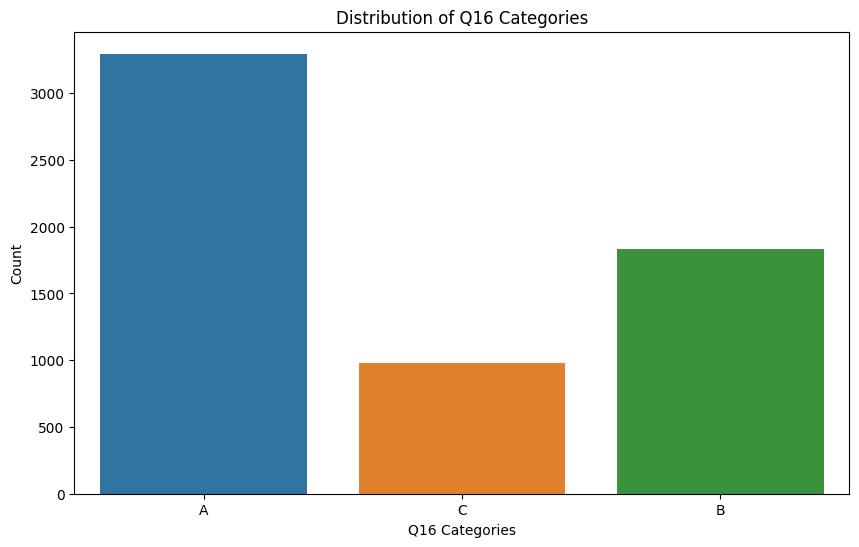

Counts for each category in Q16:
 A    3295
B    1834
C     979
Name: Q16, dtype: int64


In [13]:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data_imputed, x='Q16')
    plt.title('Distribution of Q16 Categories')
    plt.xlabel('Q16 Categories')
    plt.ylabel('Count')
    plt.show()
    print("Counts for each category in Q16:\n", data_imputed['Q16'].value_counts())

In [14]:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    X = data_imputed.drop('Q16', axis=1)
    y = data_imputed['Q16']
    X_sm, y_sm = smote.fit_resample(X, y)

In [15]:
    data_balanced = pd.DataFrame(X_sm, columns=X.columns)
    data_balanced['Q16'] = y_sm

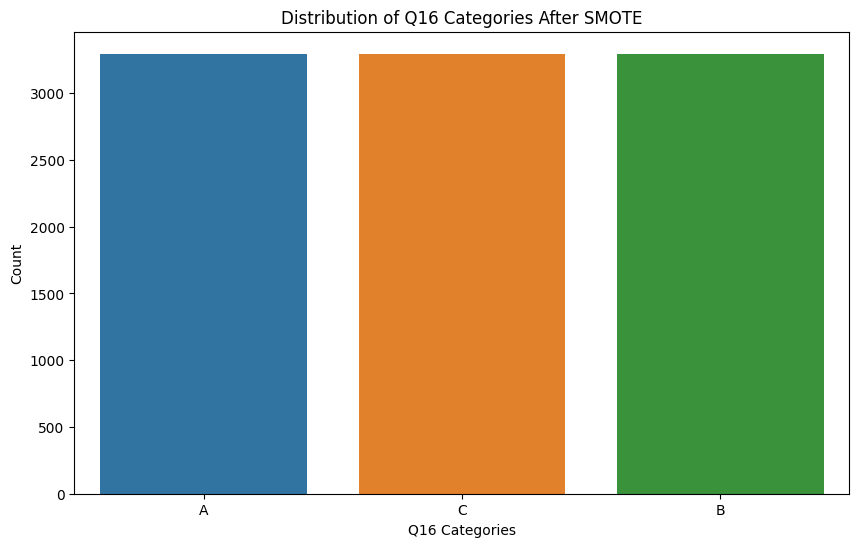

First few rows after applying SMOTE:
    Q11_1  Q11_2  Q11_3  Q11_4  Q11_5  Q11_6  Q11_7  Q11_8  Q11_9  Q11_10  ...  \
0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0    0.0     0.0  ...   
1    1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0     1.0  ...   
2    1.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0     1.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0  ...   
4    1.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0     1.0  ...   

   Q18_17  Q18_18  Q18_19  Q18_20  Q18_21  Q18_22  Q18_23  Q20  Q21  Q16  
0     5.0     5.0     5.0     5.0     5.0     5.0     5.0  3.0  3.0    A  
1     4.0     2.0     4.0     2.0     2.0     2.0     2.0  3.0  3.0    A  
2     4.0     4.0     3.6     2.6     4.0     2.0     4.0  4.0  1.0    A  
3     3.4     3.0     2.6     3.2     3.4     3.4     3.2  3.0  3.0    C  
4     2.8     2.2     1.0     1.0     2.2     1.8     2.4  3.0  3.0    A  

[5 rows x 75 columns]


In [16]:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y_sm)
    plt.title('Distribution of Q16 Categories After SMOTE')
    plt.xlabel('Q16 Categories')
    plt.ylabel('Count')
    plt.show()

    print("First few rows after applying SMOTE:\n", data_balanced.head())

In [17]:
    from sklearn.ensemble import RandomForestClassifier
    X_balanced = data_balanced.drop('Q16', axis=1)
    y_balanced = data_balanced['Q16']

    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_balanced, y_balanced)
    importances = rf_clf.feature_importances_

    feature_list = list(X_balanced.columns)
    feature_importance = sorted(zip(importances, feature_list), reverse=True)
    print("Feature importance scores:")
    for score in feature_importance:
        print(score)

Feature importance scores:
(0.08936263155864389, 'Q12_14')
(0.06744833724925689, 'Q13_16')
(0.0569204540941663, 'Q17')
(0.047886982220220066, 'Q14')
(0.04697849326473085, 'Q18_14')
(0.03780214913935259, 'Q21')
(0.031583957059541486, 'Q18_1')
(0.023189796259170503, 'Q12_4')
(0.021380109909052248, 'Q18_2')
(0.019377723626174837, 'Q13_2')
(0.01844772335193806, 'Q18_23')
(0.018289512947657297, 'Q18_3')
(0.018050185243415104, 'Q18_9')
(0.017618837996809224, 'Q18_6')
(0.017394353809760864, 'Q18_21')
(0.017229191684565312, 'Q18_8')
(0.016181699683365445, 'Q18_22')
(0.01586988192410541, 'Q18_19')
(0.015859819531231008, 'Q18_20')
(0.015858141461290533, 'Q18_10')
(0.015497565298792882, 'Q18_5')
(0.01540429107630748, 'Q18_17')
(0.015043071849769532, 'Q18_18')
(0.015005136388090815, 'Q18_12')
(0.01493523478360786, 'Q18_15')
(0.014831342287774926, 'Q18_4')
(0.013824752789579607, 'Q18_13')
(0.013446984095958413, 'Q18_16')
(0.013349189226739347, 'Q18_7')
(0.013338736018006551, 'Q18_11')
(0.0114723405

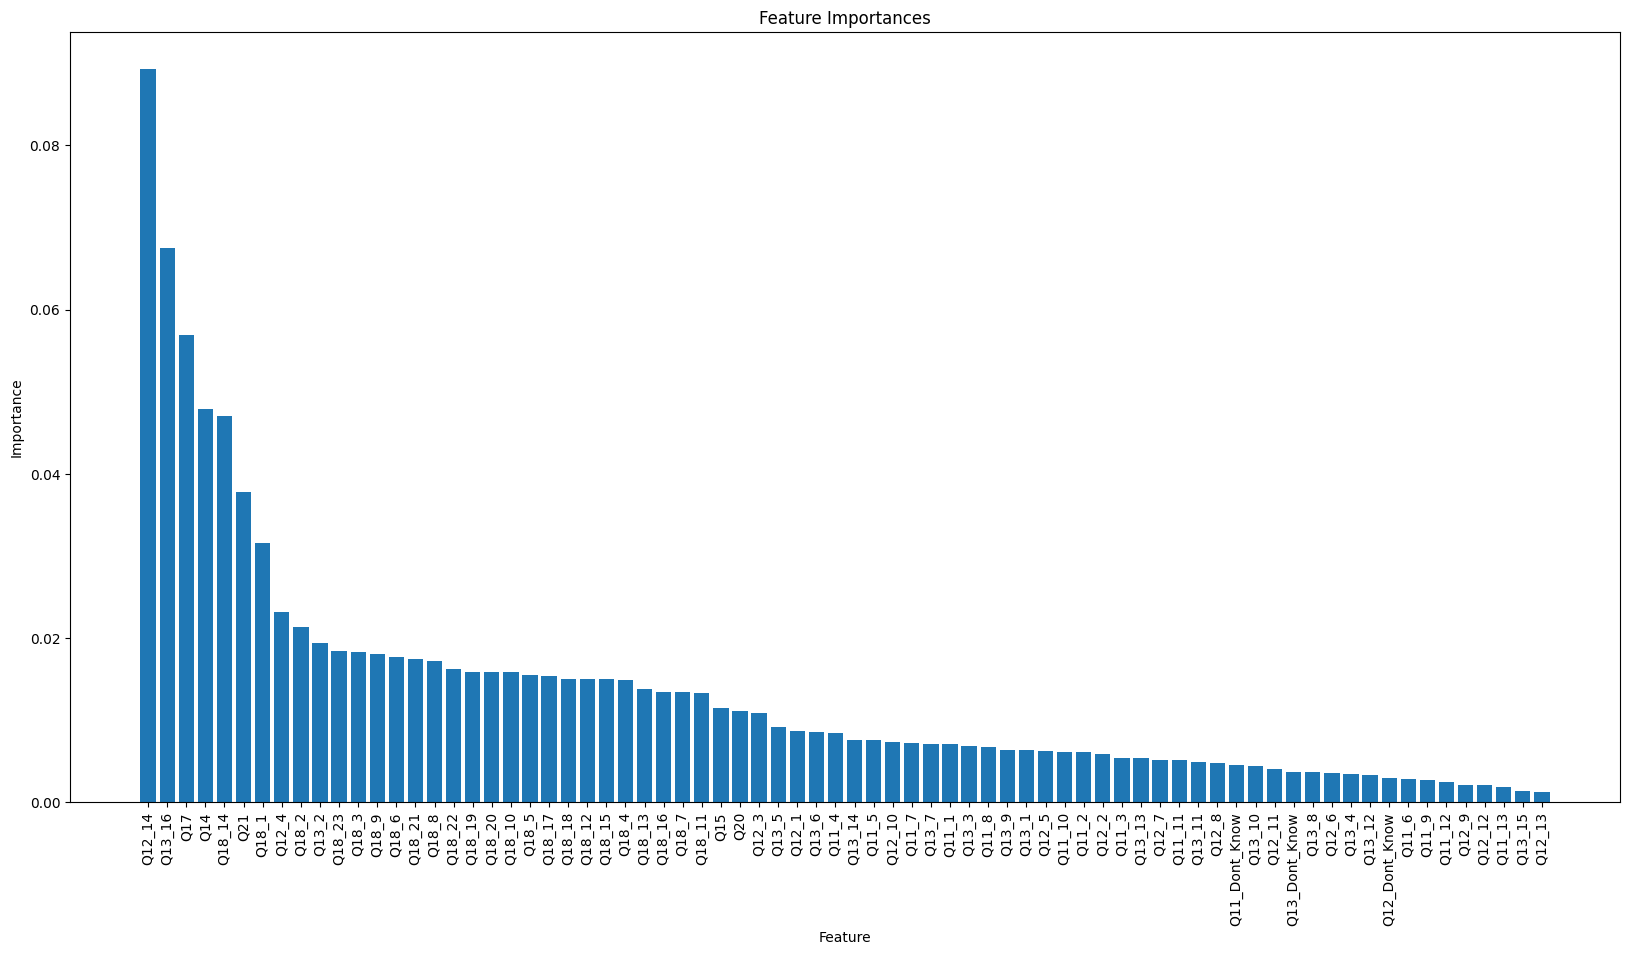

In [18]:
    import matplotlib.pyplot as plt

    importances, labels = zip(*feature_importance)

    plt.figure(figsize=(20, 10))
    plt.bar(range(len(importances)), importances, align='center')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.title('Feature Importances')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

In [19]:
    from sklearn.ensemble import RandomForestClassifier
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_balanced, y_balanced)

    importances = rf_clf.feature_importances_

    feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(X_balanced.columns, importances)]
    feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

    cumulative_importances = np.cumsum([importance for _, importance in feature_importances])

    def find_features_for_cumulative_importance(importances, threshold=0.95):
        for i, importance in enumerate(importances):
            if importance > threshold:
                return i + 1
        return len(importances)

    features_to_keep = find_features_for_cumulative_importance(cumulative_importances)
    selected_features = [feature for feature, _ in feature_importances[:features_to_keep]]

    X_reduced = X_balanced[selected_features]
    print(f"Selected Features (total {len(selected_features)}):")
    print(selected_features)

Selected Features (total 58):
['Q12_14', 'Q17', 'Q13_16', 'Q14', 'Q18_14', 'Q21', 'Q18_1', 'Q18_2', 'Q12_4', 'Q18_9', 'Q18_21', 'Q18_3', 'Q18_23', 'Q18_8', 'Q18_19', 'Q18_20', 'Q18_6', 'Q18_22', 'Q18_10', 'Q18_17', 'Q18_18', 'Q13_2', 'Q18_12', 'Q18_5', 'Q18_4', 'Q18_15', 'Q18_16', 'Q18_13', 'Q18_11', 'Q18_7', 'Q13_6', 'Q15', 'Q20', 'Q12_1', 'Q11_5', 'Q11_4', 'Q13_5', 'Q12_3', 'Q13_14', 'Q11_1', 'Q13_7', 'Q11_8', 'Q13_3', 'Q13_9', 'Q11_7', 'Q12_10', 'Q13_1', 'Q12_5', 'Q11_2', 'Q11_10', 'Q12_2', 'Q13_13', 'Q13_11', 'Q12_7', 'Q11_11', 'Q11_3', 'Q12_8', 'Q13_10']


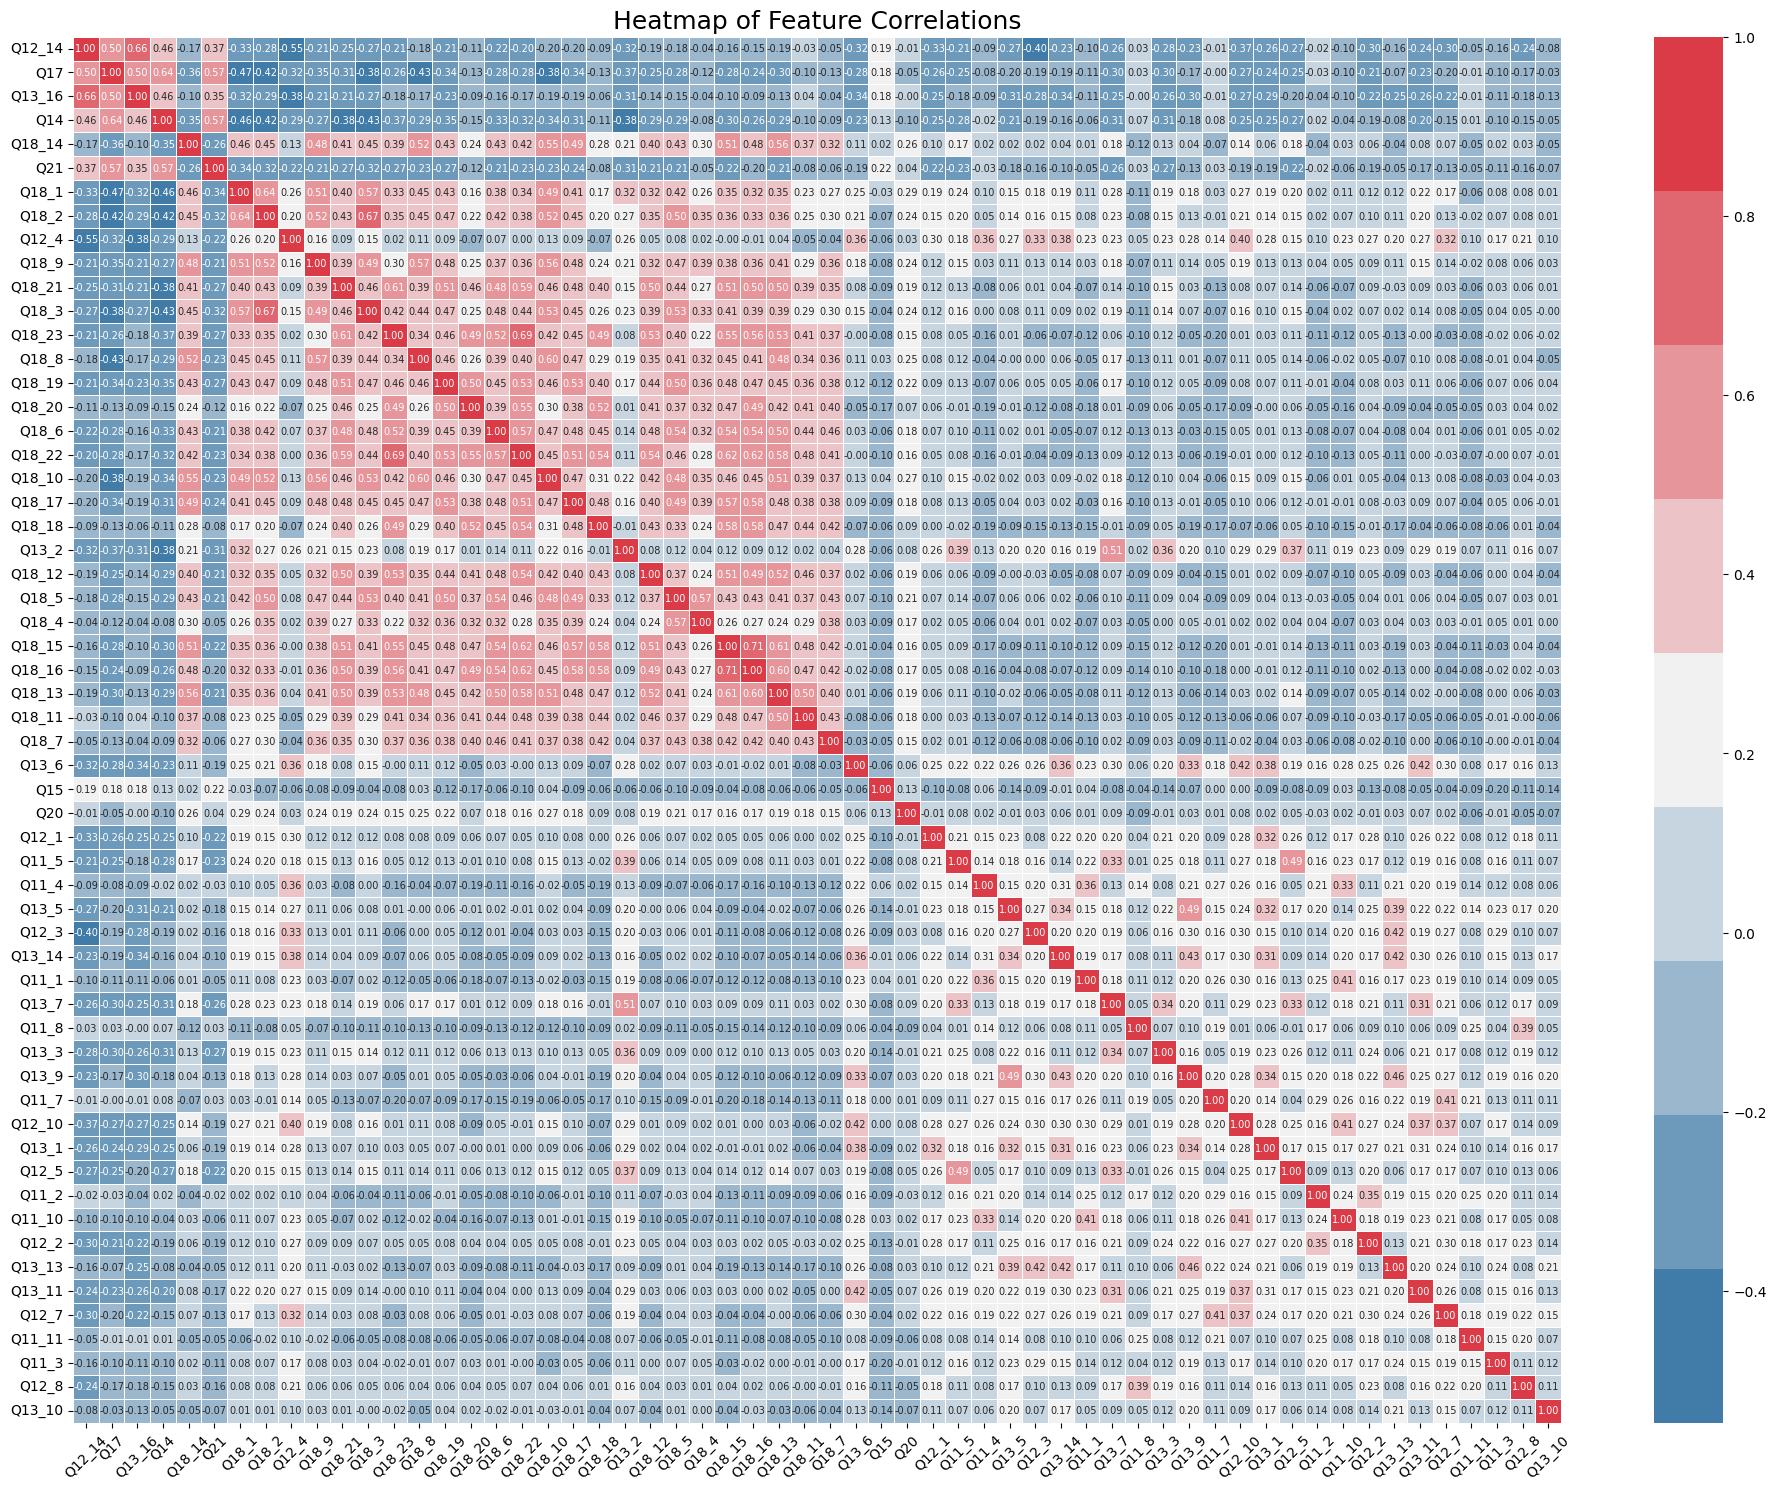

In [20]:
    corr_matrix = X_reduced.corr()
    plt.figure(figsize=(24, 18))
    cmap = sns.diverging_palette(240, 10, n=9)
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, cbar=True, annot_kws={"size": 7}, linewidths=.5)

    plt.title("Heatmap of Feature Correlations", fontsize=18)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

In [21]:
    correlation_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            correlation_pairs.append((abs(corr_matrix.iloc[i, j]), (corr_matrix.columns[i], corr_matrix.columns[j])))
    correlation_pairs = sorted(correlation_pairs, key=lambda x: x[0], reverse=True)

    print("Top Correlated Feature Pairs:")
    for corr_value, pair in correlation_pairs[:10]:  # adjust the number as needed
        print(f"{pair[0]} and {pair[1]} have a correlation of {corr_value}")

Top Correlated Feature Pairs:
Q18_15 and Q18_16 have a correlation of 0.7100959699080813
Q18_23 and Q18_22 have a correlation of 0.6912251639515389
Q18_2 and Q18_3 have a correlation of 0.6720637671123108
Q12_14 and Q13_16 have a correlation of 0.6582673671526064
Q18_1 and Q18_2 have a correlation of 0.6421453976881849
Q17 and Q14 have a correlation of 0.6357480595101791
Q18_22 and Q18_15 have a correlation of 0.6202595500272446
Q18_22 and Q18_16 have a correlation of 0.616736257425015
Q18_15 and Q18_13 have a correlation of 0.6124734936855469
Q18_21 and Q18_23 have a correlation of 0.6116083859924921


In [22]:
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neural_network import MLPClassifier
    from xgboost import XGBClassifier
    from sklearn.linear_model import LogisticRegression, SGDClassifier
    from sklearn.preprocessing import LabelEncoder
    from sklearn.naive_bayes import GaussianNB


In [23]:
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_balanced)

    models = [
        ('Decision Tree', DecisionTreeClassifier(), y_balanced),
        ('Random Forest', RandomForestClassifier(), y_balanced),
        ('Gradient Boosting', GradientBoostingClassifier(), y_balanced),
        ('AdaBoost', AdaBoostClassifier(), y_balanced),
        ('SVC', SVC(probability=True), y_balanced),
        ('K-Nearest Neighbors', KNeighborsClassifier(), y_balanced),
        ('MLP', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000), y_balanced),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), y_encoded),
        ('Logistic Regression', LogisticRegression(max_iter=1000), y_balanced),
        ('SGD Classifier', SGDClassifier(loss='log_loss', max_iter=1000), y_balanced),
        ('Naive Bayes', GaussianNB(), y_balanced)
    ]


Decision Tree - Fold 1 Results:
Accuracy: 0.6206, F1: 0.6258, Precision: 0.6388, Recall: 0.6206, MCC: 0.4332, ROC AUC: 0.7155

Decision Tree - Fold 2 Results:
Accuracy: 0.6566, F1: 0.6543, Precision: 0.6603, Recall: 0.6566, MCC: 0.4885, ROC AUC: 0.7424

Decision Tree - Fold 3 Results:
Accuracy: 0.7183, F1: 0.7163, Precision: 0.7148, Recall: 0.7183, MCC: 0.5776, ROC AUC: 0.7887

Decision Tree - Fold 4 Results:
Accuracy: 0.7906, F1: 0.7881, Precision: 0.8009, Recall: 0.7906, MCC: 0.6919, ROC AUC: 0.8429

Decision Tree - Fold 5 Results:
Accuracy: 0.7987, F1: 0.7978, Precision: 0.8065, Recall: 0.7987, MCC: 0.7019, ROC AUC: 0.8490



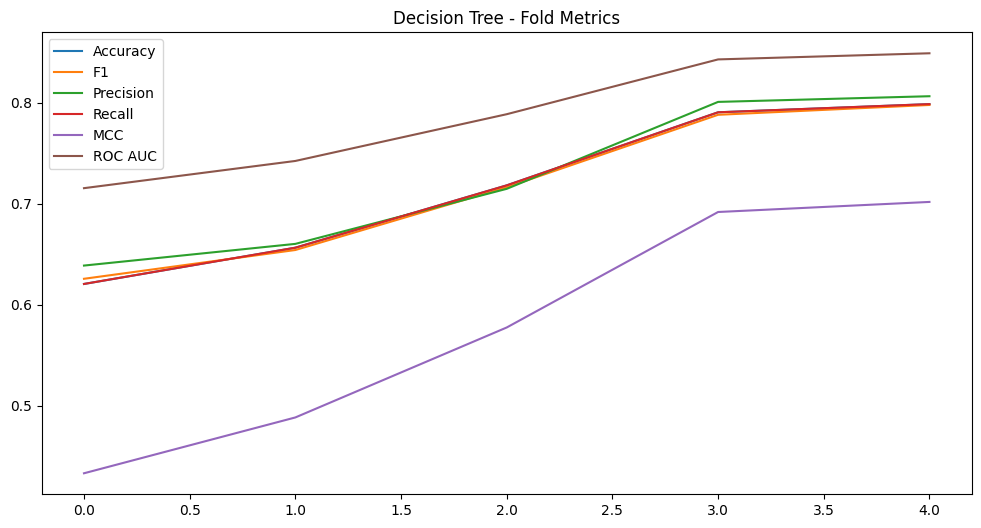

Random Forest - Fold 1 Results:
Accuracy: 0.6940, F1: 0.6942, Precision: 0.7093, Recall: 0.6940, MCC: 0.5476, ROC AUC: 0.8790

Random Forest - Fold 2 Results:
Accuracy: 0.7481, F1: 0.7412, Precision: 0.7618, Recall: 0.7481, MCC: 0.6349, ROC AUC: 0.9141

Random Forest - Fold 3 Results:
Accuracy: 0.8103, F1: 0.8035, Precision: 0.8151, Recall: 0.8103, MCC: 0.7235, ROC AUC: 0.9387

Random Forest - Fold 4 Results:
Accuracy: 0.9054, F1: 0.9054, Precision: 0.9154, Recall: 0.9054, MCC: 0.8626, ROC AUC: 0.9858

Random Forest - Fold 5 Results:
Accuracy: 0.9105, F1: 0.9104, Precision: 0.9182, Recall: 0.9105, MCC: 0.8692, ROC AUC: 0.9854



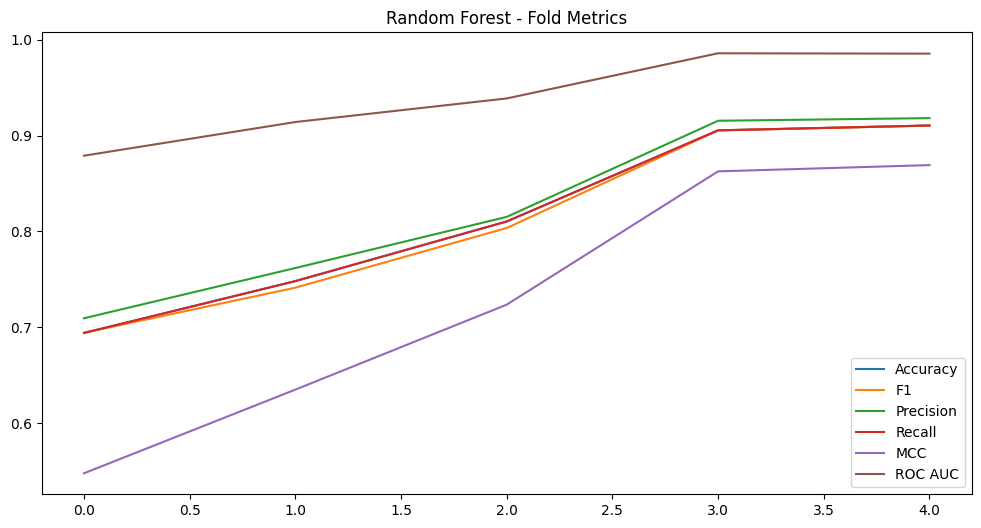

Gradient Boosting - Fold 1 Results:
Accuracy: 0.6616, F1: 0.6613, Precision: 0.6792, Recall: 0.6616, MCC: 0.5000, ROC AUC: 0.8459

Gradient Boosting - Fold 2 Results:
Accuracy: 0.7208, F1: 0.7141, Precision: 0.7259, Recall: 0.7208, MCC: 0.5897, ROC AUC: 0.8863

Gradient Boosting - Fold 3 Results:
Accuracy: 0.7774, F1: 0.7710, Precision: 0.7748, Recall: 0.7774, MCC: 0.6707, ROC AUC: 0.9170

Gradient Boosting - Fold 4 Results:
Accuracy: 0.8508, F1: 0.8527, Precision: 0.8653, Recall: 0.8508, MCC: 0.7805, ROC AUC: 0.9648

Gradient Boosting - Fold 5 Results:
Accuracy: 0.8508, F1: 0.8527, Precision: 0.8630, Recall: 0.8508, MCC: 0.7795, ROC AUC: 0.9626



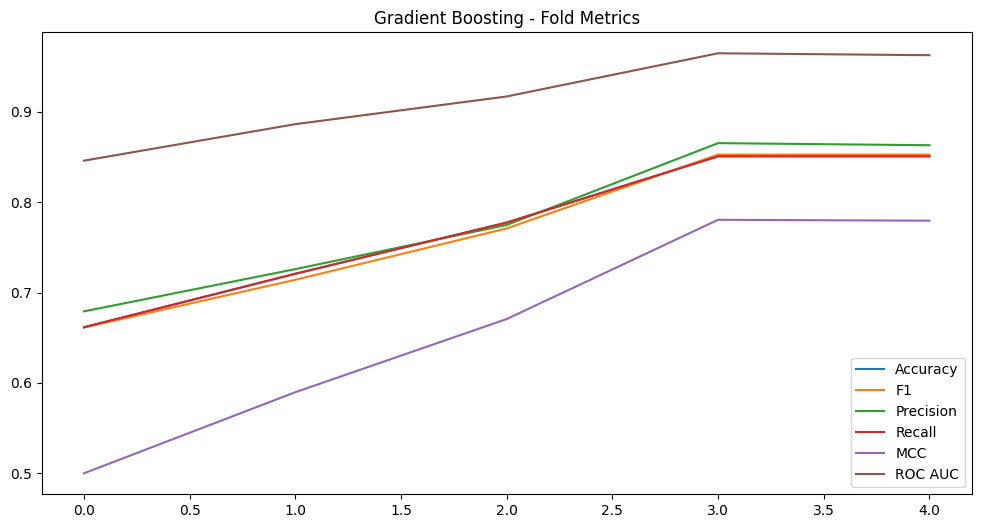

AdaBoost - Fold 1 Results:
Accuracy: 0.6201, F1: 0.6267, Precision: 0.6451, Recall: 0.6201, MCC: 0.4334, ROC AUC: 0.8045

AdaBoost - Fold 2 Results:
Accuracy: 0.6904, F1: 0.6883, Precision: 0.6934, Recall: 0.6904, MCC: 0.5388, ROC AUC: 0.8356

AdaBoost - Fold 3 Results:
Accuracy: 0.7385, F1: 0.7320, Precision: 0.7318, Recall: 0.7385, MCC: 0.6104, ROC AUC: 0.8610

AdaBoost - Fold 4 Results:
Accuracy: 0.7769, F1: 0.7754, Precision: 0.7810, Recall: 0.7769, MCC: 0.6682, ROC AUC: 0.8859

AdaBoost - Fold 5 Results:
Accuracy: 0.7860, F1: 0.7849, Precision: 0.7909, Recall: 0.7860, MCC: 0.6821, ROC AUC: 0.8844



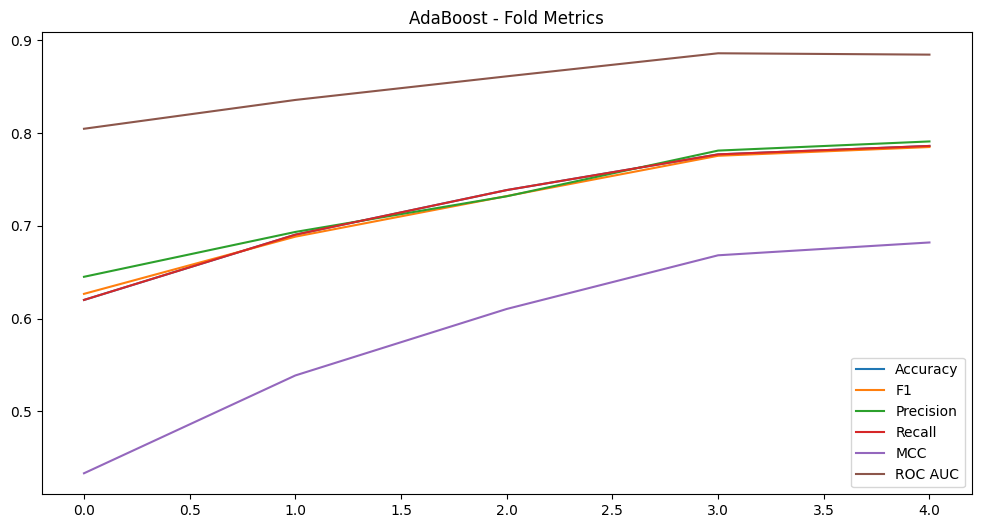

SVC - Fold 1 Results:
Accuracy: 0.6753, F1: 0.6780, Precision: 0.6820, Recall: 0.6753, MCC: 0.5133, ROC AUC: 0.8483

SVC - Fold 2 Results:
Accuracy: 0.7152, F1: 0.7165, Precision: 0.7189, Recall: 0.7152, MCC: 0.5732, ROC AUC: 0.8798

SVC - Fold 3 Results:
Accuracy: 0.7385, F1: 0.7376, Precision: 0.7371, Recall: 0.7385, MCC: 0.6079, ROC AUC: 0.8971

SVC - Fold 4 Results:
Accuracy: 0.7466, F1: 0.7471, Precision: 0.7477, Recall: 0.7466, MCC: 0.6199, ROC AUC: 0.8993

SVC - Fold 5 Results:
Accuracy: 0.7613, F1: 0.7613, Precision: 0.7620, Recall: 0.7613, MCC: 0.6421, ROC AUC: 0.9076



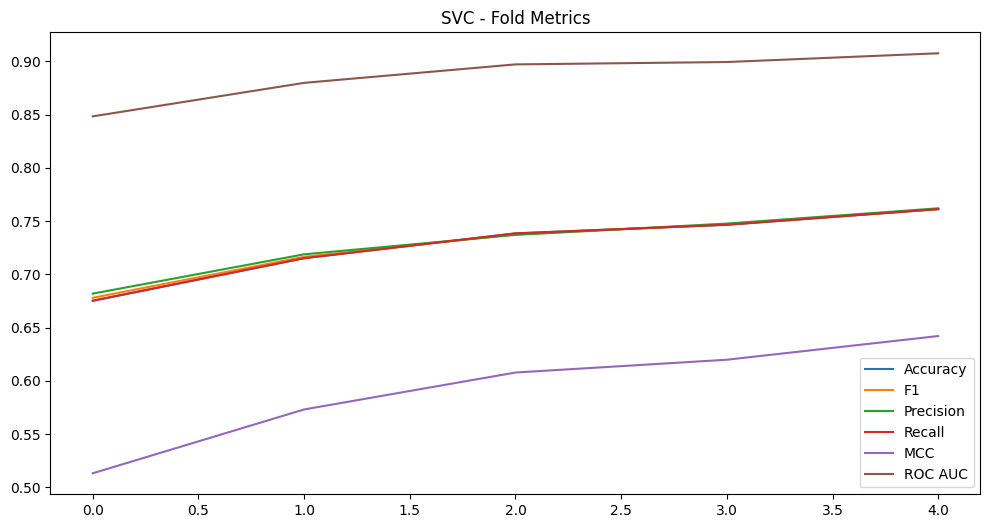

K-Nearest Neighbors - Fold 1 Results:
Accuracy: 0.6702, F1: 0.6547, Precision: 0.6827, Recall: 0.6702, MCC: 0.5198, ROC AUC: 0.8366

K-Nearest Neighbors - Fold 2 Results:
Accuracy: 0.7107, F1: 0.7032, Precision: 0.7190, Recall: 0.7107, MCC: 0.5744, ROC AUC: 0.8680

K-Nearest Neighbors - Fold 3 Results:
Accuracy: 0.7430, F1: 0.7321, Precision: 0.7526, Recall: 0.7430, MCC: 0.6261, ROC AUC: 0.8957

K-Nearest Neighbors - Fold 4 Results:
Accuracy: 0.8053, F1: 0.7984, Precision: 0.8239, Recall: 0.8053, MCC: 0.7199, ROC AUC: 0.9274

K-Nearest Neighbors - Fold 5 Results:
Accuracy: 0.7972, F1: 0.7882, Precision: 0.8211, Recall: 0.7972, MCC: 0.7107, ROC AUC: 0.9332



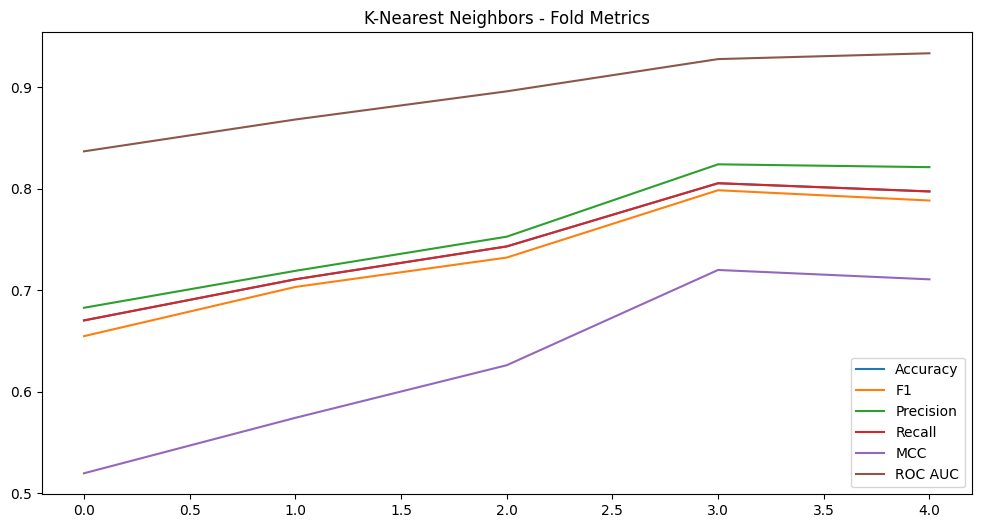

MLP - Fold 1 Results:
Accuracy: 0.6940, F1: 0.6944, Precision: 0.6950, Recall: 0.6940, MCC: 0.5410, ROC AUC: 0.8489

MLP - Fold 2 Results:
Accuracy: 0.7481, F1: 0.7446, Precision: 0.7482, Recall: 0.7481, MCC: 0.6254, ROC AUC: 0.8805

MLP - Fold 3 Results:
Accuracy: 0.7845, F1: 0.7809, Precision: 0.7795, Recall: 0.7845, MCC: 0.6777, ROC AUC: 0.9031

MLP - Fold 4 Results:
Accuracy: 0.8594, F1: 0.8569, Precision: 0.8706, Recall: 0.8594, MCC: 0.7960, ROC AUC: 0.9471

MLP - Fold 5 Results:
Accuracy: 0.8827, F1: 0.8807, Precision: 0.8998, Recall: 0.8827, MCC: 0.8333, ROC AUC: 0.9544



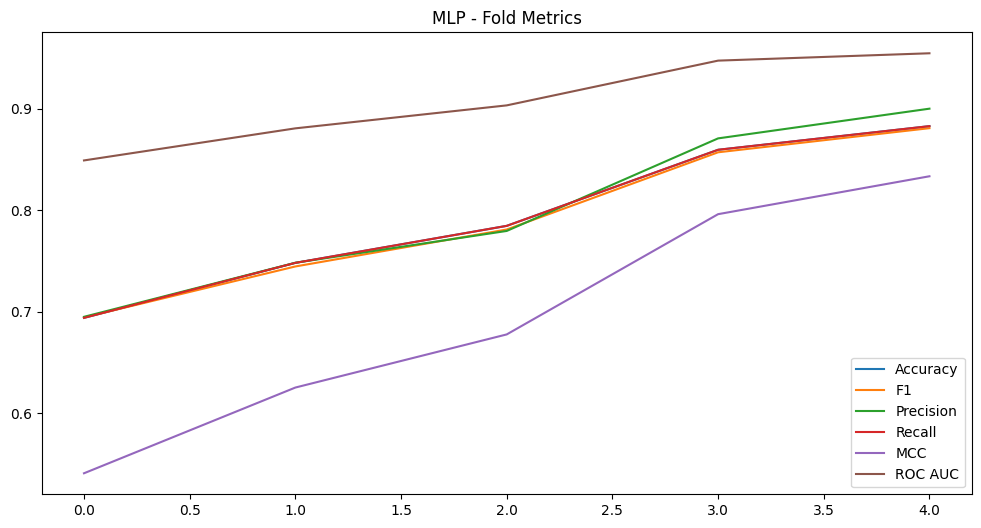

XGBoost - Fold 1 Results:
Accuracy: 0.6904, F1: 0.6886, Precision: 0.7139, Recall: 0.6904, MCC: 0.5482, ROC AUC: 0.8625

XGBoost - Fold 2 Results:
Accuracy: 0.7597, F1: 0.7536, Precision: 0.7740, Recall: 0.7597, MCC: 0.6521, ROC AUC: 0.9058

XGBoost - Fold 3 Results:
Accuracy: 0.7982, F1: 0.7927, Precision: 0.7993, Recall: 0.7982, MCC: 0.7026, ROC AUC: 0.9306

XGBoost - Fold 4 Results:
Accuracy: 0.9049, F1: 0.9043, Precision: 0.9166, Recall: 0.9049, MCC: 0.8631, ROC AUC: 0.9902

XGBoost - Fold 5 Results:
Accuracy: 0.9069, F1: 0.9066, Precision: 0.9167, Recall: 0.9069, MCC: 0.8649, ROC AUC: 0.9898



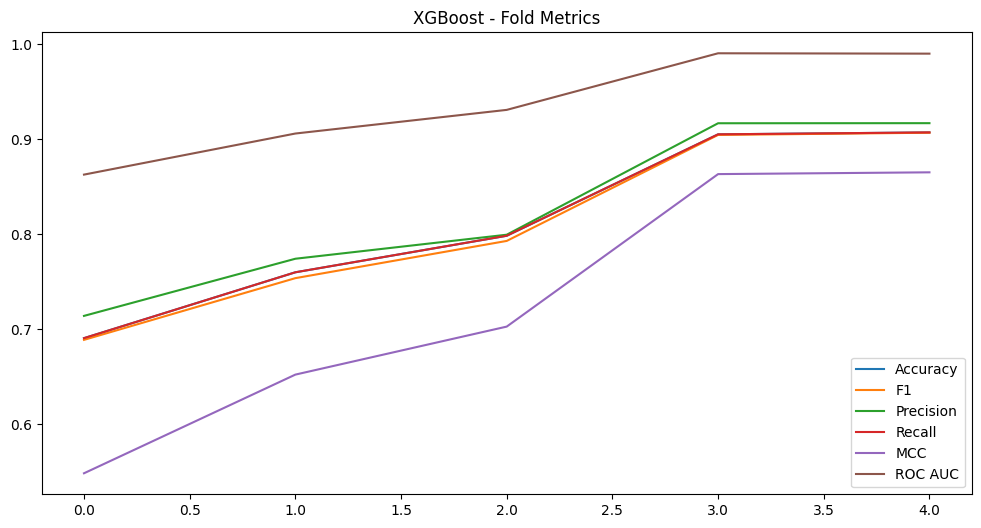

Logistic Regression - Fold 1 Results:
Accuracy: 0.6545, F1: 0.6580, Precision: 0.6639, Recall: 0.6545, MCC: 0.4828, ROC AUC: 0.8380

Logistic Regression - Fold 2 Results:
Accuracy: 0.6980, F1: 0.6996, Precision: 0.7019, Recall: 0.6980, MCC: 0.5473, ROC AUC: 0.8740

Logistic Regression - Fold 3 Results:
Accuracy: 0.7193, F1: 0.7186, Precision: 0.7180, Recall: 0.7193, MCC: 0.5790, ROC AUC: 0.8873

Logistic Regression - Fold 4 Results:
Accuracy: 0.7218, F1: 0.7215, Precision: 0.7214, Recall: 0.7218, MCC: 0.5828, ROC AUC: 0.8842

Logistic Regression - Fold 5 Results:
Accuracy: 0.7355, F1: 0.7344, Precision: 0.7335, Recall: 0.7355, MCC: 0.6033, ROC AUC: 0.8923



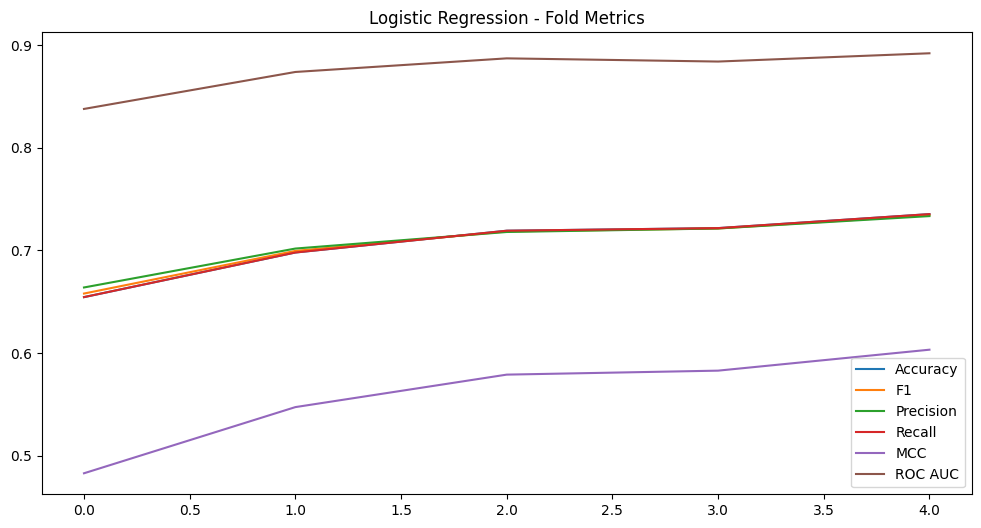

SGD Classifier - Fold 1 Results:
Accuracy: 0.6232, F1: 0.6055, Precision: 0.6754, Recall: 0.6232, MCC: 0.4642, ROC AUC: 0.8332

SGD Classifier - Fold 2 Results:
Accuracy: 0.6363, F1: 0.6121, Precision: 0.7113, Recall: 0.6363, MCC: 0.4873, ROC AUC: 0.8601

SGD Classifier - Fold 3 Results:
Accuracy: 0.7122, F1: 0.7111, Precision: 0.7169, Recall: 0.7122, MCC: 0.5711, ROC AUC: 0.8801

SGD Classifier - Fold 4 Results:
Accuracy: 0.6808, F1: 0.6754, Precision: 0.7379, Recall: 0.6808, MCC: 0.5477, ROC AUC: 0.8755

SGD Classifier - Fold 5 Results:
Accuracy: 0.6555, F1: 0.6382, Precision: 0.7396, Recall: 0.6555, MCC: 0.5221, ROC AUC: 0.8811



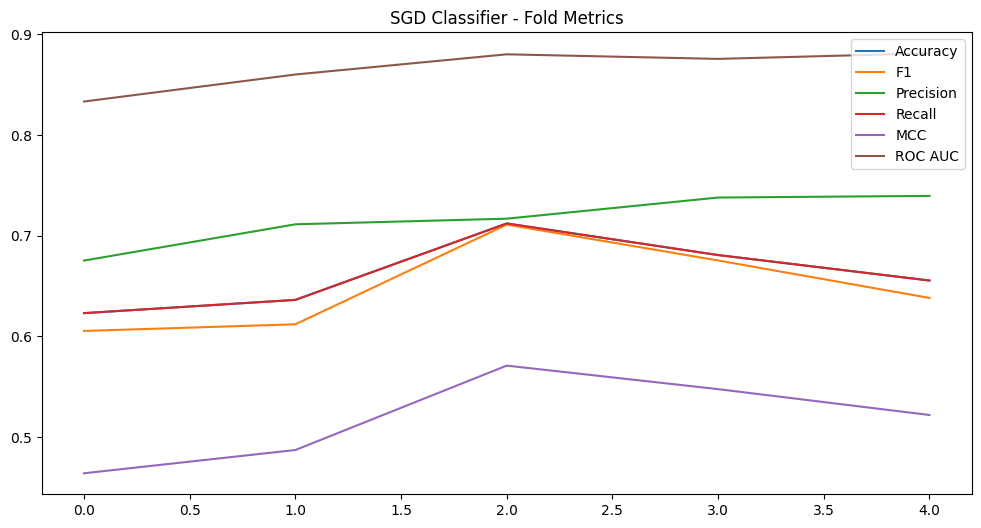

Naive Bayes - Fold 1 Results:
Accuracy: 0.5908, F1: 0.5928, Precision: 0.5953, Recall: 0.5908, MCC: 0.3863, ROC AUC: 0.7829

Naive Bayes - Fold 2 Results:
Accuracy: 0.6485, F1: 0.6419, Precision: 0.6413, Recall: 0.6485, MCC: 0.4751, ROC AUC: 0.8277

Naive Bayes - Fold 3 Results:
Accuracy: 0.6687, F1: 0.6571, Precision: 0.6563, Recall: 0.6687, MCC: 0.5073, ROC AUC: 0.8453

Naive Bayes - Fold 4 Results:
Accuracy: 0.6576, F1: 0.6488, Precision: 0.6476, Recall: 0.6576, MCC: 0.4893, ROC AUC: 0.8407

Naive Bayes - Fold 5 Results:
Accuracy: 0.6697, F1: 0.6612, Precision: 0.6627, Recall: 0.6697, MCC: 0.5086, ROC AUC: 0.8472



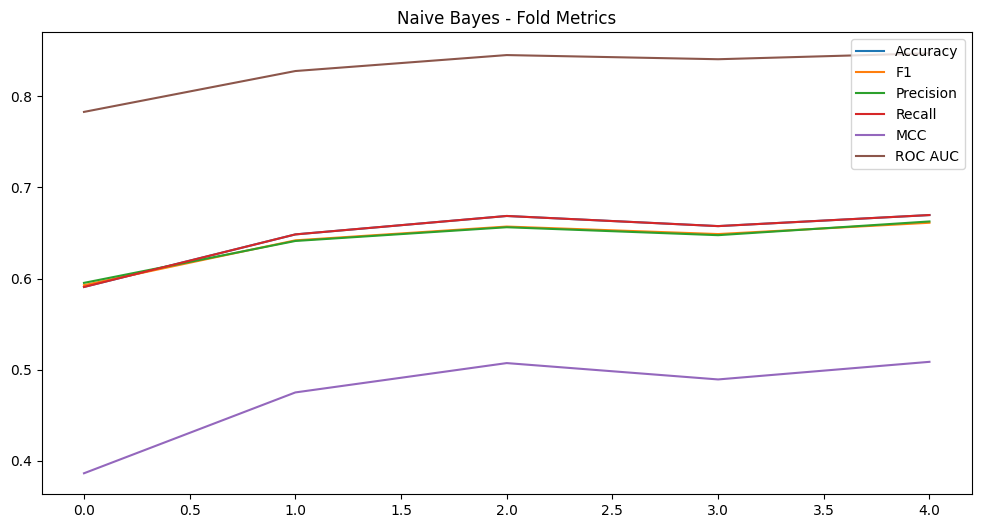

In [24]:
    all_model_results = {}
    for model_name, model, y_target in models:
        cv = StratifiedKFold(n_splits=5)
        fold_num = 0
        fold_results = []
        for train_index, test_index in cv.split(X_reduced, y_target):
            fold_num += 1
            X_train, X_test = X_reduced.iloc[train_index], X_reduced.iloc[test_index]
            y_train, y_test = y_target[train_index], y_target[test_index]

            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            probas = model.predict_proba(X_test) if hasattr(model, "predict_proba") else model.decision_function(X_test)

            accuracy = accuracy_score(y_test, predictions)
            f1 = f1_score(y_test, predictions, average='macro')
            precision = precision_score(y_test, predictions, average='macro')
            recall = recall_score(y_test, predictions, average='macro')
            mcc = matthews_corrcoef(y_test, predictions)
            roc_auc = roc_auc_score(y_test, probas, multi_class="ovo", average="macro") if len(np.unique(y_test)) > 2 else roc_auc_score(y_test, probas)

            fold_results.append({
                'Fold': fold_num,
                'Accuracy': accuracy,
                'F1': f1,
                'Precision': precision,
                'Recall': recall,
                'MCC': mcc,
                'ROC AUC': roc_auc
            })

            print(f"{model_name} - Fold {fold_num} Results:")
            print(f"Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, MCC: {mcc:.4f}, ROC AUC: {roc_auc:.4f}\n")

        plt.figure(figsize=(12, 6))
        for metric in ['Accuracy', 'F1', 'Precision', 'Recall', 'MCC', 'ROC AUC']:
            plt.plot([fr[metric] for fr in fold_results], label=metric)
        plt.title(f'{model_name} - Fold Metrics')
        plt.legend()
        plt.show()

        all_model_results[model_name] = fold_results

In [25]:
    for model_name, results in all_model_results.items():
        print(f"\n{model_name} - Average Results Across Folds:")
        for metric in ['Accuracy', 'F1', 'Precision', 'Recall', 'MCC', 'ROC AUC']:
            avg_metric = np.mean([r[metric] for r in results])
            std_metric = np.std([r[metric] for r in results])
            print(f"{metric}: {avg_metric:.4f} (±{std_metric:.4f})")



Decision Tree - Average Results Across Folds:
Accuracy: 0.7169 (±0.0708)
F1: 0.7165 (±0.0691)
Precision: 0.7243 (±0.0694)
Recall: 0.7169 (±0.0708)
MCC: 0.5786 (±0.1070)
ROC AUC: 0.7877 (±0.0531)

Random Forest - Average Results Across Folds:
Accuracy: 0.8137 (±0.0853)
F1: 0.8109 (±0.0864)
Precision: 0.8240 (±0.0829)
Recall: 0.8137 (±0.0853)
MCC: 0.7276 (±0.1259)
ROC AUC: 0.9406 (±0.0414)

Gradient Boosting - Average Results Across Folds:
Accuracy: 0.7723 (±0.0738)
F1: 0.7704 (±0.0756)
Precision: 0.7817 (±0.0739)
Recall: 0.7723 (±0.0738)
MCC: 0.6641 (±0.1090)
ROC AUC: 0.9153 (±0.0455)

AdaBoost - Average Results Across Folds:
Accuracy: 0.7224 (±0.0613)
F1: 0.7215 (±0.0585)
Precision: 0.7284 (±0.0545)
Recall: 0.7224 (±0.0613)
MCC: 0.5866 (±0.0918)
ROC AUC: 0.8543 (±0.0309)

SVC - Average Results Across Folds:
Accuracy: 0.7274 (±0.0300)
F1: 0.7281 (±0.0290)
Precision: 0.7295 (±0.0276)
Recall: 0.7274 (±0.0300)
MCC: 0.5913 (±0.0449)
ROC AUC: 0.8864 (±0.0211)

K-Nearest Neighbors - Average 

In [26]:
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import numpy as np

    average_accuracies = {}

    for model_name, results in all_model_results.items():
        average_accuracy = np.mean([fr['Accuracy'] for fr in results])
        average_accuracies[model_name] = average_accuracy
    sorted_models = sorted(average_accuracies.items(), key=lambda x: x[1], reverse=True)

Random Forest: 0.8137
XGBoost: 0.8120
MLP: 0.7937
Gradient Boosting: 0.7723
K-Nearest Neighbors: 0.7453
SVC: 0.7274
AdaBoost: 0.7224
Decision Tree: 0.7169
Logistic Regression: 0.7058
SGD Classifier: 0.6616
Naive Bayes: 0.6470


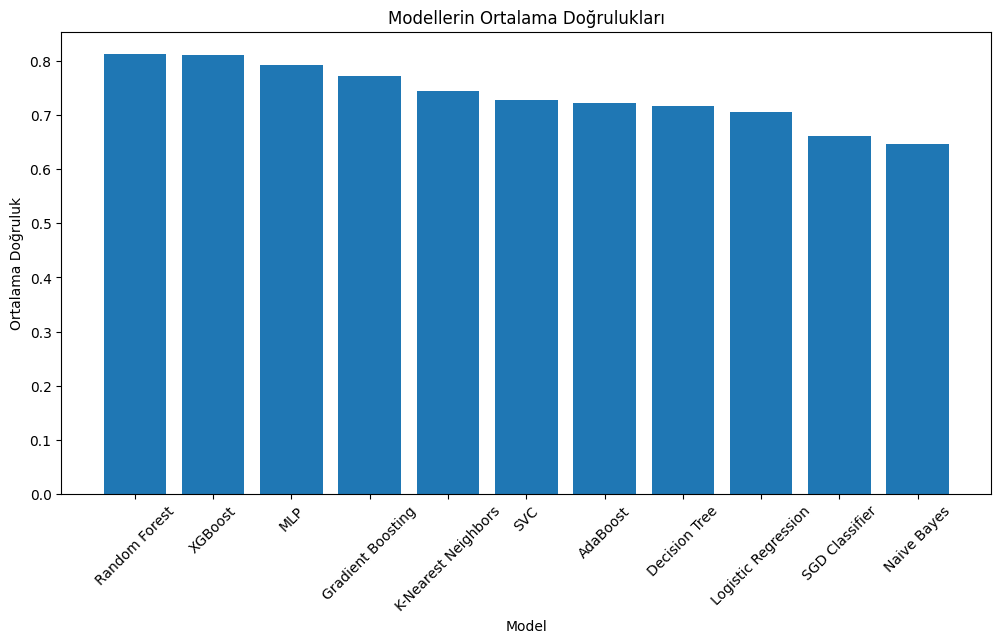

In [27]:
    for model_name, accuracy in sorted_models:
        print(f"{model_name}: {accuracy:.4f}")

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(sorted_models)), [acc for _, acc in sorted_models], tick_label=[name for name, _ in sorted_models])
    plt.xticks(rotation=45)
    plt.title('Modellerin Ortalama Doğrulukları')
    plt.xlabel('Model')
    plt.ylabel('Ortalama Doğruluk')
    plt.show()

In [28]:
    # best model
    best_model_name, best_model, best_y_target = models[0]
    best_accuracy = 0
    for model_name, _, y_target in models:
        if average_accuracies[model_name] > best_accuracy:
            best_accuracy = average_accuracies[model_name]
            best_model_name = model_name
            best_model = model
            best_y_target = y_target
    print(f"En iyi model: {best_model_name} ile ortalama doğruluk: {best_accuracy:.4f}")

En iyi model: Random Forest ile ortalama doğruluk: 0.8137


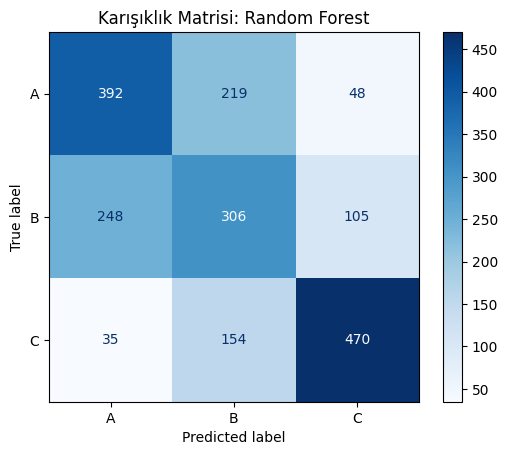

In [29]:
    # cm for best model
    train_index, test_index = next(StratifiedKFold(n_splits=5).split(X_reduced, best_y_target))
    X_train, X_test = X_reduced.iloc[train_index], X_reduced.iloc[test_index]
    y_train, y_test = best_y_target[train_index], best_y_target[test_index]

    best_model.fit(X_train, y_train)
    predictions = best_model.predict(X_test)

    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(best_y_target))

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Karışıklık Matrisi: {best_model_name}')
    plt.show()